In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import sys
print(sys.version)

3.6.7 (v3.6.7:6ec5cf24b7, Oct 20 2018, 03:02:14) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


In [2]:
def my_custom_loss_func(y_true, y_pred):
    cm = confusion_matrix(y_true,y_pred)
    print(cm)
    tn, fp, fn, tp = cm.ravel()
    score = ((-25)*fp + (-5)*fn + 5*tp) / len(y_true)
    return (score)

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer




from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

def normalization(train):
    feature_scaler = MinMaxScaler()
    X_scaled = pd.DataFrame(feature_scaler.fit_transform(train.values), columns=train.columns, index=train.index)
    return X_scaled


In [4]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



train_pure= normalization(pd.read_csv('train.csv',sep=',',index_col=0))

col=train_pure.columns

fraud_train=  train_pure[train_pure['fraud']==1]

x_pure= fraud_train.drop('fraud',axis=1)


x_train= normalization(x_pure)

Using TensorFlow backend.


In [17]:
x_train.shape

(1896, 20)

In [18]:
import GAN_171103

# For reloading after making changes
import importlib
importlib.reload(GAN_171103) 
from GAN_171103 import *

In [19]:
rand_dim = x_train.shape[1] # 32 # needs to be ~data_dim
base_n_count = 128 # 128

nb_steps = 500 + 1 # 50000 # Add one for logging of the last interval
batch_size = 128 # 64

k_d = 1  # number of critic network updates per adversarial training step
k_g = 1  # number of generator network updates per adversarial training step
critic_pre_train_steps = 100 # 100  # number of steps to pre-train the critic before starting adversarial training
log_interval = 100 # 100  # interval (in steps) at which to log loss summaries and save plots of image samples to disc
learning_rate = 5e-4 # 5e-5
data_dir = 'cache/'
generator_model_path, discriminator_model_path, loss_pickle_path = None, None, None

# show = False
show = True 

# train = create_toy_spiral_df(1000)
# train = create_toy_df(n=1000,n_dim=2,n_classes=4,seed=0)
train = train_pure.copy().reset_index(drop=True) # fraud only with labels from classification


# train = pd.get_dummies(train, columns=['Class'], prefix='Class', drop_first=True)
label_cols = [ i for i in train.columns if 'fraud' in i ]
data_cols = [ i for i in train.columns if i not in label_cols ]
train[ data_cols ] = train[ data_cols ] / 10 # scale to random noise size, one less thing to learn
train_no_label = train[ data_cols ]
train_no_label

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,scannedLineItems,pricePerScannedLineItem,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro
0,0.08,0.057518,0.054717,0.063636,0.00,0.06,0.000405,0.000137,0.002194,9.655172e-02,0.001972,0.000000,0.002069,0.000221,0.000000,0.000142,1.306336e-05,0.000013,0.000000,0.000082
1,0.04,0.005796,0.027364,0.045455,0.02,0.08,0.001936,0.000669,0.003247,4.482759e-02,0.002044,0.001429,0.005714,0.001543,0.000412,0.001852,2.661889e-06,0.000018,0.000009,0.000219
2,0.04,0.082777,0.062181,0.027273,0.10,0.10,0.000120,0.000108,0.002098,4.137931e-02,0.005002,0.007692,0.007692,0.000066,0.000147,0.000165,1.653922e-05,0.000005,0.000020,0.000121
3,0.10,0.097813,0.092346,0.072727,0.04,0.08,0.000235,0.000136,0.002508,9.655172e-02,0.003329,0.001379,0.002759,0.000149,0.000050,0.000112,1.315384e-05,0.000009,0.000005,0.000065
4,0.08,0.023401,0.081561,0.027273,0.07,0.04,0.000934,0.000501,0.001010,8.965517e-02,0.003158,0.002593,0.001481,0.000233,0.000362,0.000233,3.562612e-06,0.000004,0.000011,0.000037
5,0.00,0.041990,0.011086,0.100000,0.05,0.04,0.000498,0.000038,0.003846,8.620690e-02,0.000445,0.001923,0.001538,0.000476,0.000144,0.000130,4.711848e-05,0.000099,0.000056,0.000271
6,0.04,0.015965,0.055648,0.018182,0.07,0.02,0.000553,0.000500,0.001653,3.448276e-02,0.005290,0.006364,0.001818,0.000227,0.000529,0.000170,3.569934e-06,0.000004,0.000016,0.000027
7,0.02,0.084363,0.022801,0.000000,0.08,0.08,0.000089,0.000039,0.000000,3.103448e-02,0.002384,0.008000,0.008000,0.000000,0.000115,0.000129,4.598558e-05,0.000000,0.000044,0.000263
8,0.10,0.052488,0.065463,0.063636,0.00,0.04,0.000413,0.000180,0.002357,8.965517e-02,0.002535,0.000000,0.001481,0.000243,0.000000,0.000104,9.962040e-06,0.000011,0.000000,0.000046
9,0.02,0.039530,0.041091,0.090909,0.02,0.08,0.000550,0.000150,0.003367,8.965517e-02,0.001591,0.000741,0.002963,0.000460,0.000061,0.000276,1.196340e-05,0.000024,0.000006,0.000146


data_dim:  20
data_cols:  ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition', 'scannedLineItems', 'pricePerScannedLineItem', 'scansWithoutRegistrationPerScannedLineItem', 'quantityModificationsPerScannedLineItem', 'lineItemVoidsPerSecond', 'scansWithoutRegistrationPerSecond', 'quantityModificationsPerSecond', 'secondsPerEuro', 'lineItemVoidsPerEuro', 'scansWithoutRegistrationPerEuro', 'quantityModificationsPerEuro']
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 20)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 128)               2688      
_________________________________________________________________
dense_55 (Dense)             (None, 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Step: 0 of 501.
Losses: G, D Gen, D Real, Xgb: 0.6775, 0.7347, 0.6887, 1.0000
D Real - D Gen: -0.0461


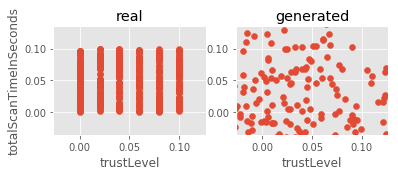

Step: 100 of 501.
Losses: G, D Gen, D Real, Xgb: 0.6893, 0.7090, 0.6663, 0.9939
D Real - D Gen: -0.0428


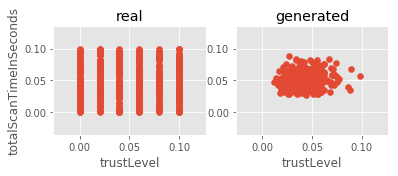

Step: 200 of 501.
Losses: G, D Gen, D Real, Xgb: 0.8089, 0.6412, 0.6455, 0.9736
D Real - D Gen: 0.0044


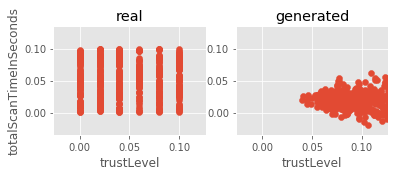

Step: 300 of 501.
Losses: G, D Gen, D Real, Xgb: 0.6186, 0.8101, 0.6194, 0.9959
D Real - D Gen: -0.1908


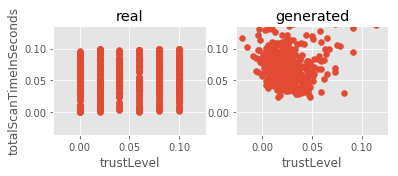

Step: 400 of 501.
Losses: G, D Gen, D Real, Xgb: 0.6797, 0.7384, 0.6427, 0.9939
D Real - D Gen: -0.0957


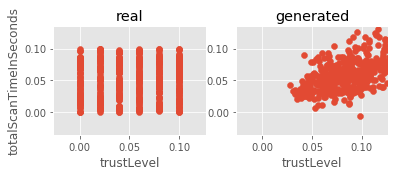

Step: 500 of 501.
Losses: G, D Gen, D Real, Xgb: 0.7889, 0.6420, 0.7154, 0.9919
D Real - D Gen: 0.0735


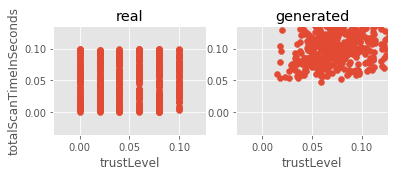

In [20]:
k_d = 1  # number of critic network updates per adversarial training step
learning_rate = 5e-4 # 5e-5
arguments = [rand_dim, nb_steps, batch_size, 
             k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
            data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show ]

adversarial_training_GAN(arguments, train_no_label, data_cols ) # GAN

In [21]:
# Let's look at some of the generated data
# First create the networks locally and load the weights

import GAN_171103
import importlib
importlib.reload(GAN_171103) # For reloading after making changes
from GAN_171103 import *

seed = 17

train = fraud_train.copy().reset_index(drop=True) # fraud only with labels from classification

# train = pd.get_dummies(train, columns=['Class'], prefix='Class', drop_first=True)
label_cols = [ i for i in train.columns if 'fraud' in i ]
data_cols = [ i for i in train.columns if i not in label_cols ]
train[ data_cols ] = train[ data_cols ] / 10 # scale to random noise size, one less thing to learn
train_no_label = train[ data_cols ]

data_dim = len(data_cols)
label_dim = len(label_cols)
with_class = False
if label_dim > 0: with_class = True
np.random.seed(seed)

# define network models

# generator_model, discriminator_model, combined_model = define_models_CGAN(rand_dim, data_dim, label_dim, base_n_count, type='Wasserstein')
# generator_model.load_weights('cache/WCGAN_generator_model_weights_step_4800.h5')
#generator_model, discriminator_model, combined_model = define_models_CGAN(rand_dim, data_dim, label_dim, base_n_count)
#generator_model.load_weights('cache/CGAN_generator_model_weights_step_500.h5')


# with_class = False
# train = train_no_label
# label_cols = []
# # generator_model, discriminator_model, combined_model = define_models_GAN(rand_dim, data_dim, base_n_count, type='Wasserstein')
# # generator_model.load_weights('cache/WGAN_generator_model_weights_step_4800.h5')

generator_model, discriminator_model, combined_model = define_models_GAN(rand_dim, data_dim, base_n_count)
generator_model.load_weights('cache/GAN_generator_model_weights_step_500.h5')

In [22]:
# Now generate some new data

test_size = 492 # Equal to all of the fraud cases

x = train_pure
z = np.random.normal(size=(test_size, rand_dim))
labels = x.iloc[:,-label_dim]
g_z = generator_model.predict([z])


In [23]:
g_z.shape
train_fake = pd.DataFrame(data=g_z,columns= col.drop('fraud'))
train_fake['fraud']= 1.0

cols= col.tolist()
cols.remove('fraud')
cols.append('fraud')
train_pure= train_pure[cols]

In [24]:
concat =np.concatenate((train_pure,train_fake)) 
train_fake = pd.DataFrame(data=concat,columns=cols)

x_pure= train_fake.drop('fraud',axis=1)
y_pure= train_fake['fraud']

x_train, x_holdout, y_train, y_holdout = train_test_split(x_pure, y_pure, test_size=0.2, random_state=324)
col

Index(['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids',
       'scansWithoutRegistration', 'quantityModifications',
       'scannedLineItemsPerSecond', 'valuePerSecond',
       'lineItemVoidsPerPosition', 'fraud', 'scannedLineItems',
       'pricePerScannedLineItem', 'scansWithoutRegistrationPerScannedLineItem',
       'quantityModificationsPerScannedLineItem', 'lineItemVoidsPerSecond',
       'scansWithoutRegistrationPerSecond', 'quantityModificationsPerSecond',
       'secondsPerEuro', 'lineItemVoidsPerEuro',
       'scansWithoutRegistrationPerEuro', 'quantityModificationsPerEuro'],
      dtype='object')

In [25]:
train_fake

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,scannedLineItems,...,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro,fraud
0,0.800000,0.575178,0.547174,0.636364,0.000000,0.600000,0.004045,0.001370,0.021944,9.655172e-01,...,0.000000,0.020690,0.002214,0.000000,0.001423,0.000131,0.000128,0.000000,0.000823,0.0
1,0.400000,0.057955,0.273637,0.454545,0.200000,0.800000,0.019364,0.006689,0.032468,4.482759e-01,...,0.014286,0.057143,0.015432,0.004115,0.018519,0.000027,0.000183,0.000091,0.002193,0.0
2,0.400000,0.827775,0.621811,0.272727,1.000000,1.000000,0.001204,0.001083,0.020979,4.137931e-01,...,0.076923,0.076923,0.000660,0.001466,0.001649,0.000165,0.000048,0.000201,0.001207,0.0
3,1.000000,0.978130,0.923462,0.727273,0.400000,0.800000,0.002347,0.001361,0.025078,9.655172e-01,...,0.013793,0.027586,0.001489,0.000496,0.001117,0.000132,0.000087,0.000054,0.000650,0.0
4,0.800000,0.234008,0.815608,0.272727,0.700000,0.400000,0.009337,0.005007,0.010101,8.965517e-01,...,0.025926,0.014815,0.002326,0.003618,0.002326,0.000036,0.000037,0.000107,0.000368,0.0
5,0.000000,0.419902,0.110855,1.000000,0.500000,0.400000,0.004983,0.000380,0.038462,8.620690e-01,...,0.019231,0.015385,0.004762,0.001443,0.001299,0.000471,0.000992,0.000564,0.002705,1.0
6,0.400000,0.159650,0.556478,0.181818,0.700000,0.200000,0.005531,0.004996,0.016529,3.448276e-01,...,0.063636,0.018182,0.002268,0.005291,0.001701,0.000036,0.000036,0.000157,0.000270,0.0
7,0.200000,0.843630,0.228014,0.000000,0.800000,0.800000,0.000889,0.000390,0.000000,3.103448e-01,...,0.080000,0.080000,0.000000,0.001151,0.001294,0.000460,0.000000,0.000439,0.002632,0.0
8,1.000000,0.524877,0.654627,0.636364,0.000000,0.400000,0.004128,0.001796,0.023569,8.965517e-01,...,0.000000,0.014815,0.002426,0.000000,0.001040,0.000100,0.000107,0.000000,0.000458,0.0
9,0.200000,0.395298,0.410905,0.909091,0.200000,0.800000,0.005504,0.001496,0.033670,8.965517e-01,...,0.007407,0.029630,0.004598,0.000613,0.002759,0.000120,0.000243,0.000061,0.001461,0.0


In [26]:
attr_dim= x_holdout.shape[1]
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=attr_dim))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train, y_train, nb_epoch=256, validation_data=(x_holdout, y_holdout),verbose=1)

history.history


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 1896 samples, validate on 475 samples
Epoch 1/256
1896/1896 [==============================] - 2s 833us/step - loss: 0.7761 - acc: 0.2558 - val_loss: 0.7256 - val_acc: 0.3263
Epoch 2/256
1896/1896 [==============================] - 0s 34us/step - loss: 0.6825 - acc: 0.4678 - val_loss: 0.6443 - val_acc: 0.5768
Epoch 3/256
1896/1896 [==============================] - 0s 33us/step - loss: 0.6054 - acc: 0.6719 - val_loss: 0.5766 - val_acc: 0.7137
Epoch 4/256
1896/1896 [==============================] - 0s 33us/step - loss: 0.5436 - acc: 0.7431 - val_loss: 0.5243 - val_acc: 0.7389
Epoch 5/256
1896/1896 [==============================] - 0s 33us/step - loss: 0.4966 - acc: 0.7474 - val_loss: 0.4847 - val_acc: 0.7474
Epoch 6/256
1896/1896 [==============================] - 0s 33us/step - loss: 0.4613 - acc: 0.7489 - val_loss: 0.4557 - val_acc: 0.7474
Epoch 7/256
1896/1896 [==============================] - 0s 33us/step - loss: 0.4351 - acc: 0.7489 - val_loss: 0.4339 - val_acc: 0.7474


1896/1896 [==============================] - 0s 33us/step - loss: 0.1899 - acc: 0.9499 - val_loss: 0.2175 - val_acc: 0.9453
Epoch 61/256
1896/1896 [==============================] - 0s 33us/step - loss: 0.1886 - acc: 0.9504 - val_loss: 0.2166 - val_acc: 0.9453
Epoch 62/256
1896/1896 [==============================] - 0s 33us/step - loss: 0.1873 - acc: 0.9504 - val_loss: 0.2157 - val_acc: 0.9453
Epoch 63/256
1896/1896 [==============================] - 0s 32us/step - loss: 0.1861 - acc: 0.9504 - val_loss: 0.2148 - val_acc: 0.9453
Epoch 64/256
1896/1896 [==============================] - 0s 33us/step - loss: 0.1849 - acc: 0.9499 - val_loss: 0.2139 - val_acc: 0.9432
Epoch 65/256
1896/1896 [==============================] - 0s 33us/step - loss: 0.1838 - acc: 0.9499 - val_loss: 0.2131 - val_acc: 0.9432
Epoch 66/256
1896/1896 [==============================] - 0s 33us/step - loss: 0.1827 - acc: 0.9494 - val_loss: 0.2123 - val_acc: 0.9432
Epoch 67/256
1896/1896 [==============================

Epoch 120/256
1896/1896 [==============================] - 0s 33us/step - loss: 0.1510 - acc: 0.9430 - val_loss: 0.1955 - val_acc: 0.9368
Epoch 121/256
1896/1896 [==============================] - 0s 33us/step - loss: 0.1507 - acc: 0.9420 - val_loss: 0.1954 - val_acc: 0.9368
Epoch 122/256
1896/1896 [==============================] - 0s 32us/step - loss: 0.1505 - acc: 0.9430 - val_loss: 0.1954 - val_acc: 0.9368
Epoch 123/256
1896/1896 [==============================] - 0s 32us/step - loss: 0.1501 - acc: 0.9425 - val_loss: 0.1953 - val_acc: 0.9347
Epoch 124/256
1896/1896 [==============================] - 0s 33us/step - loss: 0.1499 - acc: 0.9430 - val_loss: 0.1954 - val_acc: 0.9347
Epoch 125/256
1896/1896 [==============================] - 0s 54us/step - loss: 0.1496 - acc: 0.9425 - val_loss: 0.1953 - val_acc: 0.9347
Epoch 126/256
1896/1896 [==============================] - 0s 41us/step - loss: 0.1492 - acc: 0.9436 - val_loss: 0.1952 - val_acc: 0.9368
Epoch 127/256
1896/1896 [=========

1896/1896 [==============================] - 0s 33us/step - loss: 0.1385 - acc: 0.9451 - val_loss: 0.1936 - val_acc: 0.9389
Epoch 180/256
1896/1896 [==============================] - 0s 32us/step - loss: 0.1383 - acc: 0.9457 - val_loss: 0.1935 - val_acc: 0.9389
Epoch 181/256
1896/1896 [==============================] - 0s 32us/step - loss: 0.1382 - acc: 0.9451 - val_loss: 0.1933 - val_acc: 0.9389
Epoch 182/256
1896/1896 [==============================] - 0s 33us/step - loss: 0.1380 - acc: 0.9457 - val_loss: 0.1932 - val_acc: 0.9389
Epoch 183/256
1896/1896 [==============================] - 0s 33us/step - loss: 0.1379 - acc: 0.9446 - val_loss: 0.1931 - val_acc: 0.9411
Epoch 184/256
1896/1896 [==============================] - 0s 32us/step - loss: 0.1378 - acc: 0.9451 - val_loss: 0.1930 - val_acc: 0.9411
Epoch 185/256
1896/1896 [==============================] - 0s 32us/step - loss: 0.1376 - acc: 0.9451 - val_loss: 0.1928 - val_acc: 0.9411
Epoch 186/256
1896/1896 [=======================

1896/1896 [==============================] - 0s 33us/step - loss: 0.1315 - acc: 0.9457 - val_loss: 0.1875 - val_acc: 0.9474
Epoch 239/256
1896/1896 [==============================] - 0s 32us/step - loss: 0.1314 - acc: 0.9462 - val_loss: 0.1874 - val_acc: 0.9474
Epoch 240/256
1896/1896 [==============================] - 0s 31us/step - loss: 0.1313 - acc: 0.9462 - val_loss: 0.1873 - val_acc: 0.9453
Epoch 241/256
1896/1896 [==============================] - 0s 32us/step - loss: 0.1312 - acc: 0.9462 - val_loss: 0.1872 - val_acc: 0.9453
Epoch 242/256
1896/1896 [==============================] - 0s 32us/step - loss: 0.1311 - acc: 0.9457 - val_loss: 0.1872 - val_acc: 0.9453
Epoch 243/256
1896/1896 [==============================] - 0s 33us/step - loss: 0.1310 - acc: 0.9457 - val_loss: 0.1871 - val_acc: 0.9453
Epoch 244/256
1896/1896 [==============================] - 0s 32us/step - loss: 0.1309 - acc: 0.9462 - val_loss: 0.1870 - val_acc: 0.9453
Epoch 245/256
1896/1896 [=======================

{'val_loss': [0.7256293562838906,
  0.6443390560150146,
  0.5765543393084878,
  0.5242775701221667,
  0.4846676360933404,
  0.45566879824588175,
  0.4338592521767867,
  0.41700569786523517,
  0.4040753533965663,
  0.393670083535345,
  0.38412197947502136,
  0.3759219295100162,
  0.36852129566042047,
  0.3613230730357923,
  0.35447588481401143,
  0.3482044810370395,
  0.34247571035435326,
  0.33642549445754605,
  0.33069758553253975,
  0.32491366718944753,
  0.31942408160159463,
  0.3140413060941194,
  0.3092760692144695,
  0.30452916979789735,
  0.29992015399430927,
  0.29547298619621676,
  0.2912483182706331,
  0.2872713587786022,
  0.28341692748822667,
  0.27955580717638917,
  0.27602876619288796,
  0.272761829024867,
  0.26939488210176166,
  0.2662668318497507,
  0.2630305162229036,
  0.25992909958488064,
  0.2571248062033402,
  0.2544338491715883,
  0.2518795354115336,
  0.24947553703659459,
  0.24695385801164726,
  0.2447703015804291,
  0.2426868482639915,
  0.24062103447161223,
 

In [27]:
y_pred = model.predict(x_holdout).astype(int)

validation_accuracy= my_custom_loss_func(y_holdout,y_pred)
validation_accuracy

[[354   1]
 [120   0]]


-1.3157894736842106

In [28]:
from keras.optimizers import Adam
from keras.regularizers import l1_l2
cost=[]
val_cost=[]
num_iters = [50,500]
best_val = -100
regularization_strengths = [1e-1,1e1,1e2, 1e3, 1e4, 1e5]
learning_rates = [1e-2, 1e-3, 1e-4, 1e-5]
for l_rate in learning_rates:
    for r in regularization_strengths:
        for iterations in num_iters:
            reg = l1_l2(l1=r, l2=r)
            model = Sequential()
            model.add(Dense(1, activation='sigmoid', W_regularizer=reg, input_dim=attr_dim))
            opt= Adam(lr=l_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
            model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])
            history=model.fit(x_train, y_train, nb_epoch=iterations,  batch_size=256,validation_data=(x_holdout, y_holdout))
           
            y_pred = model.predict(x_holdout).astype(int)
            validation_cost= my_custom_loss_func(y_holdout,y_pred)
            val_cost.append(validation_cost)
            
            y_pred = model.predict(x_train).astype(int)
            train_cost= my_custom_loss_func(y_train,y_pred)
            cost.append(train_cost)
            
            if validation_cost > best_val:
                best_cost= cost
                best_val_cost = val_cost
                best_history=history
                best_reg=r
                best_iter=iterations
                best_lr=l_rate
                best_val = validation_cost 
                best_model = model


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", input_dim=20, kernel_regularizer=<keras.reg...)`
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1896 samples, validate on 475 samples
Epoch 1/50
1896/1896 [==============================] - 2s 835us/step - loss: 1.4367 - acc: 0.3365 - val_loss: 1.2581 - val_acc: 0.4316
Epoch 2/50
1896/1896 [==============================] - 0s 9us/step - loss: 1.1792 - acc: 0.5132 - val_loss: 1.0564 - val_acc: 0.6800
Epoch 3/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.9964 - acc: 0.7015 - val_loss: 0.8941 - val_acc: 0.7474
Epoch 4/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.8495 - acc: 0.7458 - val_loss: 0.7725 - val_acc: 0.7474
Epoch 5/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.7376 - acc: 0.7489 - val_loss: 0.6909 - val_acc: 0.7474
Epoch 6/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6649 - acc: 0.7489 - val_loss: 0.6348 - val_acc: 0.7474
Epoch 7/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.6215 - acc: 0.7489 - val_loss: 0.6153 - val_acc: 0.7474
Epoch 8/50
18

1896/1896 [==============================] - 0s 7us/step - loss: 0.5960 - acc: 0.7489 - val_loss: 0.5944 - val_acc: 0.7474
Epoch 11/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5918 - acc: 0.7489 - val_loss: 0.5909 - val_acc: 0.7474
Epoch 12/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5874 - acc: 0.7489 - val_loss: 0.5868 - val_acc: 0.7474
Epoch 13/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5837 - acc: 0.7489 - val_loss: 0.5832 - val_acc: 0.7474
Epoch 14/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5806 - acc: 0.7489 - val_loss: 0.5804 - val_acc: 0.7474
Epoch 15/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5775 - acc: 0.7489 - val_loss: 0.5776 - val_acc: 0.7474
Epoch 16/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5753 - acc: 0.7489 - val_loss: 0.5755 - val_acc: 0.7474
Epoch 17/500
1896/1896 [==============================] - 0s 

1896/1896 [==============================] - 0s 7us/step - loss: 0.5663 - acc: 0.7489 - val_loss: 0.5681 - val_acc: 0.7474
Epoch 71/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5662 - acc: 0.7489 - val_loss: 0.5678 - val_acc: 0.7474
Epoch 72/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5661 - acc: 0.7489 - val_loss: 0.5674 - val_acc: 0.7474
Epoch 73/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5660 - acc: 0.7489 - val_loss: 0.5682 - val_acc: 0.7474
Epoch 74/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5664 - acc: 0.7489 - val_loss: 0.5689 - val_acc: 0.7474
Epoch 75/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5664 - acc: 0.7489 - val_loss: 0.5676 - val_acc: 0.7474
Epoch 76/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5662 - acc: 0.7489 - val_loss: 0.5684 - val_acc: 0.7474
Epoch 77/500
1896/1896 [==============================] - 0s 

1896/1896 [==============================] - 0s 7us/step - loss: 0.5658 - acc: 0.7489 - val_loss: 0.5678 - val_acc: 0.7474
Epoch 131/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5663 - acc: 0.7489 - val_loss: 0.5675 - val_acc: 0.7474
Epoch 132/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5658 - acc: 0.7489 - val_loss: 0.5682 - val_acc: 0.7474
Epoch 133/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5663 - acc: 0.7489 - val_loss: 0.5675 - val_acc: 0.7474
Epoch 134/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5655 - acc: 0.7489 - val_loss: 0.5671 - val_acc: 0.7474
Epoch 135/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5658 - acc: 0.7489 - val_loss: 0.5677 - val_acc: 0.7474
Epoch 136/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5658 - acc: 0.7489 - val_loss: 0.5672 - val_acc: 0.7474
Epoch 137/500
1896/1896 [==============================

Epoch 190/500
1896/1896 [==============================] - 0s 9us/step - loss: 0.5659 - acc: 0.7489 - val_loss: 0.5677 - val_acc: 0.7474
Epoch 191/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5659 - acc: 0.7489 - val_loss: 0.5675 - val_acc: 0.7474
Epoch 192/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5656 - acc: 0.7489 - val_loss: 0.5669 - val_acc: 0.7474
Epoch 193/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.5662 - acc: 0.7489 - val_loss: 0.5676 - val_acc: 0.7474
Epoch 194/500
1896/1896 [==============================] - 0s 10us/step - loss: 0.5658 - acc: 0.7489 - val_loss: 0.5677 - val_acc: 0.7474
Epoch 195/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.5660 - acc: 0.7489 - val_loss: 0.5681 - val_acc: 0.7474
Epoch 196/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.5664 - acc: 0.7489 - val_loss: 0.5675 - val_acc: 0.7474
Epoch 197/500
1896/1896 [===============

1896/1896 [==============================] - 0s 7us/step - loss: 0.5659 - acc: 0.7489 - val_loss: 0.5680 - val_acc: 0.7474
Epoch 250/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5660 - acc: 0.7489 - val_loss: 0.5676 - val_acc: 0.7474
Epoch 251/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5659 - acc: 0.7489 - val_loss: 0.5681 - val_acc: 0.7474
Epoch 252/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5658 - acc: 0.7489 - val_loss: 0.5671 - val_acc: 0.7474
Epoch 253/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5655 - acc: 0.7489 - val_loss: 0.5669 - val_acc: 0.7474
Epoch 254/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5659 - acc: 0.7489 - val_loss: 0.5679 - val_acc: 0.7474
Epoch 255/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5659 - acc: 0.7489 - val_loss: 0.5678 - val_acc: 0.7474
Epoch 256/500
1896/1896 [==============================

Epoch 309/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5656 - acc: 0.7489 - val_loss: 0.5677 - val_acc: 0.7474
Epoch 310/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5655 - acc: 0.7489 - val_loss: 0.5677 - val_acc: 0.7474
Epoch 311/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5659 - acc: 0.7489 - val_loss: 0.5680 - val_acc: 0.7474
Epoch 312/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5662 - acc: 0.7489 - val_loss: 0.5675 - val_acc: 0.7474
Epoch 313/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5660 - acc: 0.7489 - val_loss: 0.5676 - val_acc: 0.7474
Epoch 314/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5658 - acc: 0.7489 - val_loss: 0.5675 - val_acc: 0.7474
Epoch 315/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5656 - acc: 0.7489 - val_loss: 0.5670 - val_acc: 0.7474
Epoch 316/500
1896/1896 [================

Epoch 369/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5660 - acc: 0.7489 - val_loss: 0.5676 - val_acc: 0.7474
Epoch 370/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5659 - acc: 0.7489 - val_loss: 0.5667 - val_acc: 0.7474
Epoch 371/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5653 - acc: 0.7489 - val_loss: 0.5678 - val_acc: 0.7474
Epoch 372/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5657 - acc: 0.7489 - val_loss: 0.5674 - val_acc: 0.7474
Epoch 373/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5655 - acc: 0.7489 - val_loss: 0.5672 - val_acc: 0.7474
Epoch 374/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5660 - acc: 0.7489 - val_loss: 0.5680 - val_acc: 0.7474
Epoch 375/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5662 - acc: 0.7489 - val_loss: 0.5681 - val_acc: 0.7474
Epoch 376/500
1896/1896 [================

Epoch 429/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.5659 - acc: 0.7489 - val_loss: 0.5679 - val_acc: 0.7474
Epoch 430/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.5659 - acc: 0.7489 - val_loss: 0.5678 - val_acc: 0.7474
Epoch 431/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.5657 - acc: 0.7489 - val_loss: 0.5677 - val_acc: 0.7474
Epoch 432/500
1896/1896 [==============================] - 0s 9us/step - loss: 0.5657 - acc: 0.7489 - val_loss: 0.5669 - val_acc: 0.7474
Epoch 433/500
1896/1896 [==============================] - 0s 9us/step - loss: 0.5654 - acc: 0.7489 - val_loss: 0.5673 - val_acc: 0.7474
Epoch 434/500
1896/1896 [==============================] - 0s 9us/step - loss: 0.5656 - acc: 0.7489 - val_loss: 0.5678 - val_acc: 0.7474
Epoch 435/500
1896/1896 [==============================] - 0s 9us/step - loss: 0.5662 - acc: 0.7489 - val_loss: 0.5677 - val_acc: 0.7474
Epoch 436/500
1896/1896 [================

Epoch 489/500
1896/1896 [==============================] - 0s 9us/step - loss: 0.5659 - acc: 0.7489 - val_loss: 0.5673 - val_acc: 0.7474
Epoch 490/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.5656 - acc: 0.7489 - val_loss: 0.5673 - val_acc: 0.7474
Epoch 491/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.5653 - acc: 0.7489 - val_loss: 0.5672 - val_acc: 0.7474
Epoch 492/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5654 - acc: 0.7489 - val_loss: 0.5675 - val_acc: 0.7474
Epoch 493/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5657 - acc: 0.7489 - val_loss: 0.5672 - val_acc: 0.7474
Epoch 494/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.5655 - acc: 0.7489 - val_loss: 0.5678 - val_acc: 0.7474
Epoch 495/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.5662 - acc: 0.7489 - val_loss: 0.5673 - val_acc: 0.7474
Epoch 496/500
1896/1896 [================

Epoch 49/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.8077 - acc: 0.7489 - val_loss: 0.8148 - val_acc: 0.7474
Epoch 50/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.8144 - acc: 0.7489 - val_loss: 0.7998 - val_acc: 0.7474
[[355   0]
 [120   0]]
[[1420    0]
 [ 476    0]]
Train on 1896 samples, validate on 475 samples
Epoch 1/500
1896/1896 [==============================] - 2s 945us/step - loss: 70.5460 - acc: 0.5216 - val_loss: 56.7715 - val_acc: 0.5137
Epoch 2/500
1896/1896 [==============================] - 0s 8us/step - loss: 48.2404 - acc: 0.5211 - val_loss: 36.1828 - val_acc: 0.5853
Epoch 3/500
1896/1896 [==============================] - 0s 7us/step - loss: 29.7866 - acc: 0.5981 - val_loss: 21.6765 - val_acc: 0.6758
Epoch 4/500
1896/1896 [==============================] - 0s 6us/step - loss: 17.6245 - acc: 0.7009 - val_loss: 13.1890 - val_acc: 0.7474
Epoch 5/500
1896/1896 [==============================] - 0s 6us/step - loss: 10.930

1896/1896 [==============================] - 0s 9us/step - loss: 0.8366 - acc: 0.7489 - val_loss: 0.7948 - val_acc: 0.7474
Epoch 59/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8286 - acc: 0.7489 - val_loss: 0.8394 - val_acc: 0.7474
Epoch 60/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8324 - acc: 0.7489 - val_loss: 0.8842 - val_acc: 0.7474
Epoch 61/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8345 - acc: 0.7489 - val_loss: 0.8272 - val_acc: 0.7474
Epoch 62/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8449 - acc: 0.7489 - val_loss: 0.8076 - val_acc: 0.7474
Epoch 63/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8155 - acc: 0.7489 - val_loss: 0.8125 - val_acc: 0.7474
Epoch 64/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8254 - acc: 0.7489 - val_loss: 0.8252 - val_acc: 0.7474
Epoch 65/500
1896/1896 [==============================] - 0s 

1896/1896 [==============================] - 0s 7us/step - loss: 0.8289 - acc: 0.7489 - val_loss: 0.7784 - val_acc: 0.7474
Epoch 119/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8248 - acc: 0.7489 - val_loss: 0.8964 - val_acc: 0.7474
Epoch 120/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8378 - acc: 0.7489 - val_loss: 0.8942 - val_acc: 0.7474
Epoch 121/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8582 - acc: 0.7489 - val_loss: 0.8005 - val_acc: 0.7474
Epoch 122/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8251 - acc: 0.7489 - val_loss: 0.8507 - val_acc: 0.7474
Epoch 123/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8466 - acc: 0.7489 - val_loss: 0.8237 - val_acc: 0.7474
Epoch 124/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8250 - acc: 0.7489 - val_loss: 0.7968 - val_acc: 0.7474
Epoch 125/500
1896/1896 [==============================

Epoch 178/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8336 - acc: 0.7489 - val_loss: 0.8233 - val_acc: 0.7474
Epoch 179/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8542 - acc: 0.7489 - val_loss: 0.9092 - val_acc: 0.7474
Epoch 180/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8414 - acc: 0.7489 - val_loss: 0.8510 - val_acc: 0.7474
Epoch 181/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8712 - acc: 0.7489 - val_loss: 0.8464 - val_acc: 0.7474
Epoch 182/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8844 - acc: 0.7489 - val_loss: 0.9424 - val_acc: 0.7474
Epoch 183/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8738 - acc: 0.7489 - val_loss: 0.8879 - val_acc: 0.7474
Epoch 184/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8534 - acc: 0.7489 - val_loss: 0.7785 - val_acc: 0.7474
Epoch 185/500
1896/1896 [================

Epoch 238/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8593 - acc: 0.7489 - val_loss: 0.7935 - val_acc: 0.7474
Epoch 239/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8216 - acc: 0.7489 - val_loss: 0.8407 - val_acc: 0.7474
Epoch 240/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8547 - acc: 0.7489 - val_loss: 0.8457 - val_acc: 0.7474
Epoch 241/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8290 - acc: 0.7489 - val_loss: 0.8320 - val_acc: 0.7474
Epoch 242/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8574 - acc: 0.7489 - val_loss: 0.8514 - val_acc: 0.7474
Epoch 243/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8457 - acc: 0.7489 - val_loss: 0.8726 - val_acc: 0.7474
Epoch 244/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8923 - acc: 0.7489 - val_loss: 0.8386 - val_acc: 0.7474
Epoch 245/500
1896/1896 [================

Epoch 298/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8427 - acc: 0.7489 - val_loss: 0.7822 - val_acc: 0.7474
Epoch 299/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8259 - acc: 0.7489 - val_loss: 0.8847 - val_acc: 0.7474
Epoch 300/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8602 - acc: 0.7489 - val_loss: 0.8518 - val_acc: 0.7474
Epoch 301/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8425 - acc: 0.7489 - val_loss: 0.7766 - val_acc: 0.7474
Epoch 302/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8133 - acc: 0.7489 - val_loss: 0.9001 - val_acc: 0.7474
Epoch 303/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8591 - acc: 0.7489 - val_loss: 0.8840 - val_acc: 0.7474
Epoch 304/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8359 - acc: 0.7489 - val_loss: 0.8071 - val_acc: 0.7474
Epoch 305/500
1896/1896 [================

1896/1896 [==============================] - 0s 8us/step - loss: 0.8707 - acc: 0.7489 - val_loss: 0.8638 - val_acc: 0.7474
Epoch 358/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8505 - acc: 0.7489 - val_loss: 0.8293 - val_acc: 0.7474
Epoch 359/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8555 - acc: 0.7489 - val_loss: 0.9089 - val_acc: 0.7474
Epoch 360/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8579 - acc: 0.7489 - val_loss: 0.8728 - val_acc: 0.7474
Epoch 361/500
1896/1896 [==============================] - 0s 10us/step - loss: 0.8778 - acc: 0.7489 - val_loss: 0.7928 - val_acc: 0.7474
Epoch 362/500
1896/1896 [==============================] - 0s 9us/step - loss: 0.8600 - acc: 0.7489 - val_loss: 0.9172 - val_acc: 0.7474
Epoch 363/500
1896/1896 [==============================] - 0s 10us/step - loss: 0.8631 - acc: 0.7489 - val_loss: 0.8863 - val_acc: 0.7474
Epoch 364/500
1896/1896 [============================

Epoch 417/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8338 - acc: 0.7489 - val_loss: 0.8930 - val_acc: 0.7474
Epoch 418/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8599 - acc: 0.7489 - val_loss: 0.8047 - val_acc: 0.7474
Epoch 419/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8217 - acc: 0.7489 - val_loss: 0.8660 - val_acc: 0.7474
Epoch 420/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8818 - acc: 0.7489 - val_loss: 0.9008 - val_acc: 0.7474
Epoch 421/500
1896/1896 [==============================] - 0s 9us/step - loss: 0.8563 - acc: 0.7489 - val_loss: 0.8335 - val_acc: 0.7474
Epoch 422/500
1896/1896 [==============================] - 0s 10us/step - loss: 0.8487 - acc: 0.7489 - val_loss: 0.8477 - val_acc: 0.7474
Epoch 423/500
1896/1896 [==============================] - 0s 10us/step - loss: 0.8453 - acc: 0.7489 - val_loss: 0.8817 - val_acc: 0.7474
Epoch 424/500
1896/1896 [==============

Epoch 477/500
1896/1896 [==============================] - 0s 9us/step - loss: 0.8472 - acc: 0.7489 - val_loss: 0.8572 - val_acc: 0.7474
Epoch 478/500
1896/1896 [==============================] - 0s 10us/step - loss: 0.8423 - acc: 0.7489 - val_loss: 0.8028 - val_acc: 0.7474
Epoch 479/500
1896/1896 [==============================] - 0s 9us/step - loss: 0.8443 - acc: 0.7489 - val_loss: 0.8666 - val_acc: 0.7474
Epoch 480/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8370 - acc: 0.7489 - val_loss: 0.8970 - val_acc: 0.7474
Epoch 481/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8684 - acc: 0.7489 - val_loss: 0.8357 - val_acc: 0.7474
Epoch 482/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8396 - acc: 0.7489 - val_loss: 0.8631 - val_acc: 0.7474
Epoch 483/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.8396 - acc: 0.7489 - val_loss: 0.8451 - val_acc: 0.7474
Epoch 484/500
1896/1896 [===============

1896/1896 [==============================] - 0s 7us/step - loss: 2.6764 - acc: 0.7489 - val_loss: 2.8185 - val_acc: 0.7474
Epoch 37/50
1896/1896 [==============================] - 0s 7us/step - loss: 2.7673 - acc: 0.7489 - val_loss: 2.5937 - val_acc: 0.7474
Epoch 38/50
1896/1896 [==============================] - 0s 7us/step - loss: 2.5270 - acc: 0.7489 - val_loss: 2.3307 - val_acc: 0.7474
Epoch 39/50
1896/1896 [==============================] - 0s 6us/step - loss: 2.5555 - acc: 0.7489 - val_loss: 2.8903 - val_acc: 0.7474
Epoch 40/50
1896/1896 [==============================] - 0s 7us/step - loss: 2.8569 - acc: 0.7489 - val_loss: 2.3874 - val_acc: 0.7474
Epoch 41/50
1896/1896 [==============================] - 0s 6us/step - loss: 2.4846 - acc: 0.7489 - val_loss: 2.7007 - val_acc: 0.7474
Epoch 42/50
1896/1896 [==============================] - 0s 6us/step - loss: 2.6456 - acc: 0.7489 - val_loss: 2.8719 - val_acc: 0.7474
Epoch 43/50
1896/1896 [==============================] - 0s 6us/ste

1896/1896 [==============================] - 0s 7us/step - loss: 3.1141 - acc: 0.7489 - val_loss: 2.8799 - val_acc: 0.7474
Epoch 46/500
1896/1896 [==============================] - 0s 7us/step - loss: 2.9692 - acc: 0.7489 - val_loss: 3.3723 - val_acc: 0.7474
Epoch 47/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.3276 - acc: 0.7489 - val_loss: 3.1841 - val_acc: 0.7474
Epoch 48/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.0777 - acc: 0.7489 - val_loss: 3.1296 - val_acc: 0.7474
Epoch 49/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.1736 - acc: 0.7489 - val_loss: 3.4911 - val_acc: 0.7474
Epoch 50/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.1297 - acc: 0.7489 - val_loss: 2.7776 - val_acc: 0.7474
Epoch 51/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.2209 - acc: 0.7489 - val_loss: 3.0860 - val_acc: 0.7474
Epoch 52/500
1896/1896 [==============================] - 0s 

1896/1896 [==============================] - 0s 7us/step - loss: 3.2580 - acc: 0.7489 - val_loss: 3.4430 - val_acc: 0.7474
Epoch 106/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.1570 - acc: 0.7489 - val_loss: 3.3741 - val_acc: 0.7474
Epoch 107/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.4021 - acc: 0.7489 - val_loss: 3.4033 - val_acc: 0.7474
Epoch 108/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.3832 - acc: 0.7489 - val_loss: 2.9606 - val_acc: 0.7474
Epoch 109/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.0831 - acc: 0.7489 - val_loss: 3.6313 - val_acc: 0.7474
Epoch 110/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.4030 - acc: 0.7489 - val_loss: 3.2280 - val_acc: 0.7474
Epoch 111/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.3581 - acc: 0.7489 - val_loss: 3.5533 - val_acc: 0.7474
Epoch 112/500
1896/1896 [==============================

Epoch 165/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.0840 - acc: 0.7489 - val_loss: 3.5441 - val_acc: 0.7474
Epoch 166/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.3664 - acc: 0.7489 - val_loss: 3.7653 - val_acc: 0.7474
Epoch 167/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.3917 - acc: 0.7489 - val_loss: 3.0546 - val_acc: 0.7474
Epoch 168/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.2890 - acc: 0.7489 - val_loss: 3.3493 - val_acc: 0.7474
Epoch 169/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.1345 - acc: 0.7489 - val_loss: 3.4739 - val_acc: 0.7474
Epoch 170/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.4423 - acc: 0.7489 - val_loss: 3.2856 - val_acc: 0.7474
Epoch 171/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.3797 - acc: 0.7489 - val_loss: 3.1442 - val_acc: 0.7474
Epoch 172/500
1896/1896 [================

Epoch 225/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.2762 - acc: 0.7489 - val_loss: 3.3001 - val_acc: 0.7474
Epoch 226/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.2951 - acc: 0.7489 - val_loss: 3.7476 - val_acc: 0.7474
Epoch 227/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.4815 - acc: 0.7489 - val_loss: 2.8116 - val_acc: 0.7474
Epoch 228/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.1081 - acc: 0.7489 - val_loss: 3.4417 - val_acc: 0.7474
Epoch 229/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.3371 - acc: 0.7489 - val_loss: 3.8579 - val_acc: 0.7474
Epoch 230/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.4251 - acc: 0.7489 - val_loss: 2.9294 - val_acc: 0.7474
Epoch 231/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.2790 - acc: 0.7489 - val_loss: 3.5270 - val_acc: 0.7474
Epoch 232/500
1896/1896 [================

Epoch 285/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.3725 - acc: 0.7489 - val_loss: 3.8874 - val_acc: 0.7474
Epoch 286/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.3851 - acc: 0.7489 - val_loss: 3.2854 - val_acc: 0.7474
Epoch 287/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.2482 - acc: 0.7489 - val_loss: 3.2223 - val_acc: 0.7474
Epoch 288/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.2974 - acc: 0.7489 - val_loss: 3.1947 - val_acc: 0.7474
Epoch 289/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.2631 - acc: 0.7489 - val_loss: 3.8373 - val_acc: 0.7474
Epoch 290/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.5126 - acc: 0.7489 - val_loss: 2.6842 - val_acc: 0.7474
Epoch 291/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.0953 - acc: 0.7489 - val_loss: 3.6163 - val_acc: 0.7474
Epoch 292/500
1896/1896 [================

Epoch 345/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.2550 - acc: 0.7489 - val_loss: 3.7396 - val_acc: 0.7474
Epoch 346/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.4666 - acc: 0.7489 - val_loss: 3.2144 - val_acc: 0.7474
Epoch 347/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.1201 - acc: 0.7489 - val_loss: 3.1071 - val_acc: 0.7474
Epoch 348/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.3926 - acc: 0.7489 - val_loss: 3.7797 - val_acc: 0.7474
Epoch 349/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.3521 - acc: 0.7489 - val_loss: 3.3729 - val_acc: 0.7474
Epoch 350/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.2779 - acc: 0.7489 - val_loss: 3.0942 - val_acc: 0.7474
Epoch 351/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.2837 - acc: 0.7489 - val_loss: 3.3686 - val_acc: 0.7474
Epoch 352/500
1896/1896 [================

Epoch 405/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.4902 - acc: 0.7489 - val_loss: 3.1949 - val_acc: 0.7474
Epoch 406/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.1272 - acc: 0.7489 - val_loss: 3.5542 - val_acc: 0.7474
Epoch 407/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.3817 - acc: 0.7489 - val_loss: 3.0329 - val_acc: 0.7474
Epoch 408/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.2744 - acc: 0.7489 - val_loss: 3.6322 - val_acc: 0.7474
Epoch 409/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.4331 - acc: 0.7489 - val_loss: 3.3027 - val_acc: 0.7474
Epoch 410/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.1494 - acc: 0.7489 - val_loss: 2.9775 - val_acc: 0.7474
Epoch 411/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.3781 - acc: 0.7489 - val_loss: 3.9536 - val_acc: 0.7474
Epoch 412/500
1896/1896 [================

Epoch 465/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.4666 - acc: 0.7489 - val_loss: 3.3297 - val_acc: 0.7474
Epoch 466/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.1076 - acc: 0.7489 - val_loss: 3.3323 - val_acc: 0.7474
Epoch 467/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.3455 - acc: 0.7489 - val_loss: 3.6468 - val_acc: 0.7474
Epoch 468/500
1896/1896 [==============================] - 0s 6us/step - loss: 3.5093 - acc: 0.7489 - val_loss: 3.0870 - val_acc: 0.7474
Epoch 469/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.0932 - acc: 0.7489 - val_loss: 3.6416 - val_acc: 0.7474
Epoch 470/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.4107 - acc: 0.7489 - val_loss: 2.9036 - val_acc: 0.7474
Epoch 471/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.2598 - acc: 0.7489 - val_loss: 3.8054 - val_acc: 0.7474
Epoch 472/500
1896/1896 [================

Epoch 24/50
1896/1896 [==============================] - 0s 7us/step - loss: 25.9048 - acc: 0.7489 - val_loss: 21.2932 - val_acc: 0.7474
Epoch 25/50
1896/1896 [==============================] - 0s 6us/step - loss: 21.7733 - acc: 0.7489 - val_loss: 23.1123 - val_acc: 0.7474
Epoch 26/50
1896/1896 [==============================] - 0s 6us/step - loss: 23.3033 - acc: 0.7489 - val_loss: 26.9004 - val_acc: 0.7474
Epoch 27/50
1896/1896 [==============================] - 0s 6us/step - loss: 25.8422 - acc: 0.7489 - val_loss: 21.9959 - val_acc: 0.7474
Epoch 28/50
1896/1896 [==============================] - 0s 6us/step - loss: 23.4068 - acc: 0.7489 - val_loss: 24.7987 - val_acc: 0.7474
Epoch 29/50
1896/1896 [==============================] - 0s 6us/step - loss: 23.2925 - acc: 0.7489 - val_loss: 24.0618 - val_acc: 0.7474
Epoch 30/50
1896/1896 [==============================] - 0s 7us/step - loss: 24.8492 - acc: 0.7489 - val_loss: 27.5785 - val_acc: 0.7474
Epoch 31/50
1896/1896 [==================

Epoch 33/500
1896/1896 [==============================] - 0s 7us/step - loss: 32.7653 - acc: 0.7489 - val_loss: 23.2007 - val_acc: 0.7474
Epoch 34/500
1896/1896 [==============================] - 0s 7us/step - loss: 30.3359 - acc: 0.7489 - val_loss: 34.5692 - val_acc: 0.7474
Epoch 35/500
1896/1896 [==============================] - 0s 7us/step - loss: 33.1646 - acc: 0.7489 - val_loss: 31.2740 - val_acc: 0.7474
Epoch 36/500
1896/1896 [==============================] - 0s 6us/step - loss: 31.2160 - acc: 0.7489 - val_loss: 25.9776 - val_acc: 0.7474
Epoch 37/500
1896/1896 [==============================] - 0s 6us/step - loss: 32.7865 - acc: 0.7489 - val_loss: 35.0188 - val_acc: 0.7474
Epoch 38/500
1896/1896 [==============================] - 0s 7us/step - loss: 30.7089 - acc: 0.7489 - val_loss: 31.6975 - val_acc: 0.7474
Epoch 39/500
1896/1896 [==============================] - 0s 7us/step - loss: 33.7752 - acc: 0.7489 - val_loss: 27.8736 - val_acc: 0.7474
Epoch 40/500
1896/1896 [==========

1896/1896 [==============================] - 0s 7us/step - loss: 31.2193 - acc: 0.7489 - val_loss: 34.0009 - val_acc: 0.7474
Epoch 93/500
1896/1896 [==============================] - 0s 7us/step - loss: 34.3557 - acc: 0.7489 - val_loss: 28.9428 - val_acc: 0.7474
Epoch 94/500
1896/1896 [==============================] - 0s 6us/step - loss: 31.7765 - acc: 0.7489 - val_loss: 31.1805 - val_acc: 0.7474
Epoch 95/500
1896/1896 [==============================] - 0s 6us/step - loss: 32.7890 - acc: 0.7489 - val_loss: 34.0102 - val_acc: 0.7474
Epoch 96/500
1896/1896 [==============================] - 0s 7us/step - loss: 34.0432 - acc: 0.7489 - val_loss: 23.1485 - val_acc: 0.7474
Epoch 97/500
1896/1896 [==============================] - 0s 7us/step - loss: 30.9563 - acc: 0.7489 - val_loss: 38.3663 - val_acc: 0.7474
Epoch 98/500
1896/1896 [==============================] - 0s 7us/step - loss: 34.4063 - acc: 0.7489 - val_loss: 31.0734 - val_acc: 0.7474
Epoch 99/500
1896/1896 [=======================

1896/1896 [==============================] - 0s 7us/step - loss: 31.5869 - acc: 0.7489 - val_loss: 35.5154 - val_acc: 0.7474
Epoch 152/500
1896/1896 [==============================] - 0s 7us/step - loss: 34.3922 - acc: 0.7489 - val_loss: 33.2385 - val_acc: 0.7474
Epoch 153/500
1896/1896 [==============================] - 0s 6us/step - loss: 32.0030 - acc: 0.7489 - val_loss: 27.3494 - val_acc: 0.7474
Epoch 154/500
1896/1896 [==============================] - 0s 6us/step - loss: 34.1437 - acc: 0.7489 - val_loss: 32.6569 - val_acc: 0.7474
Epoch 155/500
1896/1896 [==============================] - 0s 7us/step - loss: 31.2933 - acc: 0.7489 - val_loss: 33.2198 - val_acc: 0.7474
Epoch 156/500
1896/1896 [==============================] - 0s 7us/step - loss: 34.8342 - acc: 0.7489 - val_loss: 28.0688 - val_acc: 0.7474
Epoch 157/500
1896/1896 [==============================] - 0s 6us/step - loss: 31.6136 - acc: 0.7489 - val_loss: 34.3022 - val_acc: 0.7474
Epoch 158/500
1896/1896 [================

1896/1896 [==============================] - 0s 7us/step - loss: 34.3127 - acc: 0.7489 - val_loss: 30.2031 - val_acc: 0.7474
Epoch 211/500
1896/1896 [==============================] - 0s 7us/step - loss: 32.1447 - acc: 0.7489 - val_loss: 31.2997 - val_acc: 0.7474
Epoch 212/500
1896/1896 [==============================] - 0s 6us/step - loss: 33.2037 - acc: 0.7489 - val_loss: 35.3265 - val_acc: 0.7474
Epoch 213/500
1896/1896 [==============================] - 0s 6us/step - loss: 34.0643 - acc: 0.7489 - val_loss: 24.4435 - val_acc: 0.7474
Epoch 214/500
1896/1896 [==============================] - 0s 7us/step - loss: 31.5982 - acc: 0.7489 - val_loss: 35.7199 - val_acc: 0.7474
Epoch 215/500
1896/1896 [==============================] - 0s 6us/step - loss: 34.3393 - acc: 0.7489 - val_loss: 32.3227 - val_acc: 0.7474
Epoch 216/500
1896/1896 [==============================] - 0s 7us/step - loss: 32.3529 - acc: 0.7489 - val_loss: 26.3321 - val_acc: 0.7474
Epoch 217/500
1896/1896 [================

1896/1896 [==============================] - 0s 8us/step - loss: 34.9005 - acc: 0.7489 - val_loss: 30.3996 - val_acc: 0.7474
Epoch 270/500
1896/1896 [==============================] - 0s 9us/step - loss: 31.7885 - acc: 0.7489 - val_loss: 28.4478 - val_acc: 0.7474
Epoch 271/500
1896/1896 [==============================] - 0s 10us/step - loss: 34.3505 - acc: 0.7489 - val_loss: 32.6424 - val_acc: 0.7474
Epoch 272/500
1896/1896 [==============================] - 0s 7us/step - loss: 31.5527 - acc: 0.7489 - val_loss: 34.3573 - val_acc: 0.7474
Epoch 273/500
1896/1896 [==============================] - 0s 7us/step - loss: 34.6931 - acc: 0.7489 - val_loss: 29.2704 - val_acc: 0.7474
Epoch 274/500
1896/1896 [==============================] - 0s 7us/step - loss: 32.1113 - acc: 0.7489 - val_loss: 31.4603 - val_acc: 0.7474
Epoch 275/500
1896/1896 [==============================] - 0s 7us/step - loss: 33.1036 - acc: 0.7489 - val_loss: 34.3657 - val_acc: 0.7474
Epoch 276/500
1896/1896 [===============

Epoch 328/500
1896/1896 [==============================] - 0s 9us/step - loss: 31.9435 - acc: 0.7489 - val_loss: 32.4674 - val_acc: 0.7474
Epoch 329/500
1896/1896 [==============================] - 0s 10us/step - loss: 33.6494 - acc: 0.7489 - val_loss: 32.4201 - val_acc: 0.7474
Epoch 330/500
1896/1896 [==============================] - 0s 9us/step - loss: 33.7909 - acc: 0.7489 - val_loss: 25.4837 - val_acc: 0.7474
Epoch 331/500
1896/1896 [==============================] - 0s 9us/step - loss: 31.7400 - acc: 0.7489 - val_loss: 35.6536 - val_acc: 0.7474
Epoch 332/500
1896/1896 [==============================] - 0s 9us/step - loss: 34.5447 - acc: 0.7489 - val_loss: 33.3953 - val_acc: 0.7474
Epoch 333/500
1896/1896 [==============================] - 0s 8us/step - loss: 32.1488 - acc: 0.7489 - val_loss: 27.4910 - val_acc: 0.7474
Epoch 334/500
1896/1896 [==============================] - 0s 8us/step - loss: 34.2971 - acc: 0.7489 - val_loss: 32.7886 - val_acc: 0.7474
Epoch 335/500
1896/1896 [=

Epoch 387/500
1896/1896 [==============================] - 0s 7us/step - loss: 31.9675 - acc: 0.7489 - val_loss: 29.4914 - val_acc: 0.7474
Epoch 388/500
1896/1896 [==============================] - 0s 7us/step - loss: 34.1206 - acc: 0.7489 - val_loss: 33.7886 - val_acc: 0.7474
Epoch 389/500
1896/1896 [==============================] - 0s 6us/step - loss: 31.9688 - acc: 0.7489 - val_loss: 31.4181 - val_acc: 0.7474
Epoch 390/500
1896/1896 [==============================] - 0s 7us/step - loss: 34.3916 - acc: 0.7489 - val_loss: 30.2877 - val_acc: 0.7474
Epoch 391/500
1896/1896 [==============================] - 0s 6us/step - loss: 32.2248 - acc: 0.7489 - val_loss: 31.3675 - val_acc: 0.7474
Epoch 392/500
1896/1896 [==============================] - 0s 6us/step - loss: 33.2823 - acc: 0.7489 - val_loss: 35.4086 - val_acc: 0.7474
Epoch 393/500
1896/1896 [==============================] - 0s 7us/step - loss: 34.1420 - acc: 0.7489 - val_loss: 24.5153 - val_acc: 0.7474
Epoch 394/500
1896/1896 [==

Epoch 446/500
1896/1896 [==============================] - 0s 7us/step - loss: 33.7496 - acc: 0.7489 - val_loss: 32.3120 - val_acc: 0.7474
Epoch 447/500
1896/1896 [==============================] - 0s 7us/step - loss: 33.9563 - acc: 0.7489 - val_loss: 26.5105 - val_acc: 0.7474
Epoch 448/500
1896/1896 [==============================] - 0s 7us/step - loss: 31.4936 - acc: 0.7489 - val_loss: 36.7892 - val_acc: 0.7474
Epoch 449/500
1896/1896 [==============================] - 0s 7us/step - loss: 34.9479 - acc: 0.7489 - val_loss: 30.4379 - val_acc: 0.7474
Epoch 450/500
1896/1896 [==============================] - 0s 6us/step - loss: 31.8312 - acc: 0.7489 - val_loss: 28.4941 - val_acc: 0.7474
Epoch 451/500
1896/1896 [==============================] - 0s 7us/step - loss: 34.3965 - acc: 0.7489 - val_loss: 32.6813 - val_acc: 0.7474
Epoch 452/500
1896/1896 [==============================] - 0s 6us/step - loss: 31.5950 - acc: 0.7489 - val_loss: 34.4046 - val_acc: 0.7474
Epoch 453/500
1896/1896 [==

1896/1896 [==============================] - 0s 8us/step - loss: 16851.5727 - acc: 0.7489 - val_loss: 11008.3441 - val_acc: 0.7474
Epoch 5/50
1896/1896 [==============================] - 0s 7us/step - loss: 8104.8412 - acc: 0.7489 - val_loss: 4662.1297 - val_acc: 0.7474
Epoch 6/50
1896/1896 [==============================] - 0s 8us/step - loss: 3534.7677 - acc: 0.7489 - val_loss: 2625.1152 - val_acc: 0.7474
Epoch 7/50
1896/1896 [==============================] - 0s 8us/step - loss: 2083.3383 - acc: 0.7489 - val_loss: 1544.7705 - val_acc: 0.7474
Epoch 8/50
1896/1896 [==============================] - 0s 8us/step - loss: 1361.1139 - acc: 0.7489 - val_loss: 1127.9016 - val_acc: 0.7474
Epoch 9/50
1896/1896 [==============================] - 0s 9us/step - loss: 851.0980 - acc: 0.7489 - val_loss: 666.3355 - val_acc: 0.7474
Epoch 10/50
1896/1896 [==============================] - 0s 8us/step - loss: 542.6190 - acc: 0.7489 - val_loss: 422.2700 - val_acc: 0.7474
Epoch 11/50
1896/1896 [=========

1896/1896 [==============================] - 0s 8us/step - loss: 316.8767 - acc: 0.7489 - val_loss: 360.9108 - val_acc: 0.7474
Epoch 13/500
1896/1896 [==============================] - 0s 7us/step - loss: 317.6970 - acc: 0.7489 - val_loss: 241.8967 - val_acc: 0.7474
Epoch 14/500
1896/1896 [==============================] - 0s 7us/step - loss: 260.2531 - acc: 0.7489 - val_loss: 279.9093 - val_acc: 0.7474
Epoch 15/500
1896/1896 [==============================] - 0s 7us/step - loss: 286.6728 - acc: 0.7489 - val_loss: 323.0204 - val_acc: 0.7474
Epoch 16/500
1896/1896 [==============================] - 0s 8us/step - loss: 266.4629 - acc: 0.7489 - val_loss: 247.1447 - val_acc: 0.7474
Epoch 17/500
1896/1896 [==============================] - 0s 8us/step - loss: 248.9793 - acc: 0.7489 - val_loss: 291.9784 - val_acc: 0.7474
Epoch 18/500
1896/1896 [==============================] - 0s 7us/step - loss: 277.4262 - acc: 0.7489 - val_loss: 227.3558 - val_acc: 0.7474
Epoch 19/500
1896/1896 [=========

1896/1896 [==============================] - 0s 8us/step - loss: 266.2589 - acc: 0.7489 - val_loss: 294.4007 - val_acc: 0.7474
Epoch 71/500
1896/1896 [==============================] - 0s 8us/step - loss: 262.8629 - acc: 0.7489 - val_loss: 302.5679 - val_acc: 0.7474
Epoch 72/500
1896/1896 [==============================] - 0s 8us/step - loss: 284.4465 - acc: 0.7489 - val_loss: 286.1934 - val_acc: 0.7474
Epoch 73/500
1896/1896 [==============================] - 0s 7us/step - loss: 266.0919 - acc: 0.7489 - val_loss: 260.3034 - val_acc: 0.7474
Epoch 74/500
1896/1896 [==============================] - 0s 7us/step - loss: 272.1440 - acc: 0.7489 - val_loss: 290.9221 - val_acc: 0.7474
Epoch 75/500
1896/1896 [==============================] - 0s 7us/step - loss: 273.9833 - acc: 0.7489 - val_loss: 304.5404 - val_acc: 0.7474
Epoch 76/500
1896/1896 [==============================] - 0s 7us/step - loss: 270.7342 - acc: 0.7489 - val_loss: 286.0732 - val_acc: 0.7474
Epoch 77/500
1896/1896 [=========

1896/1896 [==============================] - 0s 8us/step - loss: 271.0071 - acc: 0.7489 - val_loss: 299.5511 - val_acc: 0.7474
Epoch 129/500
1896/1896 [==============================] - 0s 8us/step - loss: 280.7852 - acc: 0.7489 - val_loss: 282.5698 - val_acc: 0.7474
Epoch 130/500
1896/1896 [==============================] - 0s 8us/step - loss: 267.7046 - acc: 0.7489 - val_loss: 314.3454 - val_acc: 0.7474
Epoch 131/500
1896/1896 [==============================] - 0s 8us/step - loss: 273.3136 - acc: 0.7489 - val_loss: 281.3457 - val_acc: 0.7474
Epoch 132/500
1896/1896 [==============================] - 0s 7us/step - loss: 282.4237 - acc: 0.7489 - val_loss: 277.9713 - val_acc: 0.7474
Epoch 133/500
1896/1896 [==============================] - 0s 7us/step - loss: 270.2372 - acc: 0.7489 - val_loss: 279.6387 - val_acc: 0.7474
Epoch 134/500
1896/1896 [==============================] - 0s 7us/step - loss: 264.9599 - acc: 0.7489 - val_loss: 307.3730 - val_acc: 0.7474
Epoch 135/500
1896/1896 [==

1896/1896 [==============================] - 0s 8us/step - loss: 286.3027 - acc: 0.7489 - val_loss: 263.4423 - val_acc: 0.7474
Epoch 187/500
1896/1896 [==============================] - 0s 8us/step - loss: 271.2196 - acc: 0.7489 - val_loss: 287.1393 - val_acc: 0.7474
Epoch 188/500
1896/1896 [==============================] - 0s 8us/step - loss: 262.5121 - acc: 0.7489 - val_loss: 314.6627 - val_acc: 0.7474
Epoch 189/500
1896/1896 [==============================] - 0s 9us/step - loss: 290.4987 - acc: 0.7489 - val_loss: 275.6260 - val_acc: 0.7474
Epoch 190/500
1896/1896 [==============================] - 0s 10us/step - loss: 267.4671 - acc: 0.7489 - val_loss: 280.9860 - val_acc: 0.7474
Epoch 191/500
1896/1896 [==============================] - 0s 7us/step - loss: 275.2323 - acc: 0.7489 - val_loss: 292.0007 - val_acc: 0.7474
Epoch 192/500
1896/1896 [==============================] - 0s 7us/step - loss: 278.7751 - acc: 0.7489 - val_loss: 296.5532 - val_acc: 0.7474
Epoch 193/500
1896/1896 [=

1896/1896 [==============================] - 0s 7us/step - loss: 272.5813 - acc: 0.7489 - val_loss: 257.2476 - val_acc: 0.7474
Epoch 245/500
1896/1896 [==============================] - 0s 8us/step - loss: 270.6172 - acc: 0.7489 - val_loss: 318.4564 - val_acc: 0.7474
Epoch 246/500
1896/1896 [==============================] - 0s 7us/step - loss: 282.2276 - acc: 0.7489 - val_loss: 281.7538 - val_acc: 0.7474
Epoch 247/500
1896/1896 [==============================] - 0s 7us/step - loss: 270.7487 - acc: 0.7489 - val_loss: 304.7888 - val_acc: 0.7474
Epoch 248/500
1896/1896 [==============================] - 0s 8us/step - loss: 271.1038 - acc: 0.7489 - val_loss: 291.1457 - val_acc: 0.7474
Epoch 249/500
1896/1896 [==============================] - 0s 7us/step - loss: 286.5332 - acc: 0.7489 - val_loss: 265.7863 - val_acc: 0.7474
Epoch 250/500
1896/1896 [==============================] - 0s 7us/step - loss: 269.7630 - acc: 0.7489 - val_loss: 298.4988 - val_acc: 0.7474
Epoch 251/500
1896/1896 [==

1896/1896 [==============================] - 0s 7us/step - loss: 271.5704 - acc: 0.7489 - val_loss: 297.9986 - val_acc: 0.7474
Epoch 303/500
1896/1896 [==============================] - 0s 7us/step - loss: 283.5591 - acc: 0.7489 - val_loss: 272.4853 - val_acc: 0.7474
Epoch 304/500
1896/1896 [==============================] - 0s 7us/step - loss: 274.7042 - acc: 0.7489 - val_loss: 274.6023 - val_acc: 0.7474
Epoch 305/500
1896/1896 [==============================] - 0s 7us/step - loss: 261.5049 - acc: 0.7489 - val_loss: 332.9075 - val_acc: 0.7474
Epoch 306/500
1896/1896 [==============================] - 0s 7us/step - loss: 291.2993 - acc: 0.7489 - val_loss: 274.2077 - val_acc: 0.7474
Epoch 307/500
1896/1896 [==============================] - 0s 7us/step - loss: 269.9165 - acc: 0.7489 - val_loss: 270.6548 - val_acc: 0.7474
Epoch 308/500
1896/1896 [==============================] - 0s 8us/step - loss: 272.4204 - acc: 0.7489 - val_loss: 301.1282 - val_acc: 0.7474
Epoch 309/500
1896/1896 [==

1896/1896 [==============================] - 0s 7us/step - loss: 286.4561 - acc: 0.7489 - val_loss: 300.3621 - val_acc: 0.7474
Epoch 361/500
1896/1896 [==============================] - 0s 8us/step - loss: 273.1143 - acc: 0.7489 - val_loss: 255.6592 - val_acc: 0.7474
Epoch 362/500
1896/1896 [==============================] - 0s 8us/step - loss: 272.8070 - acc: 0.7489 - val_loss: 307.8827 - val_acc: 0.7474
Epoch 363/500
1896/1896 [==============================] - 0s 8us/step - loss: 279.1891 - acc: 0.7489 - val_loss: 290.5550 - val_acc: 0.7474
Epoch 364/500
1896/1896 [==============================] - 0s 7us/step - loss: 273.9625 - acc: 0.7489 - val_loss: 291.9525 - val_acc: 0.7474
Epoch 365/500
1896/1896 [==============================] - 0s 7us/step - loss: 269.8325 - acc: 0.7489 - val_loss: 309.0752 - val_acc: 0.7474
Epoch 366/500
1896/1896 [==============================] - 0s 7us/step - loss: 287.0609 - acc: 0.7489 - val_loss: 264.1340 - val_acc: 0.7474
Epoch 367/500
1896/1896 [==

1896/1896 [==============================] - 0s 8us/step - loss: 270.8532 - acc: 0.7489 - val_loss: 298.5668 - val_acc: 0.7474
Epoch 419/500
1896/1896 [==============================] - 0s 9us/step - loss: 274.6539 - acc: 0.7489 - val_loss: 285.0192 - val_acc: 0.7474
Epoch 420/500
1896/1896 [==============================] - 0s 8us/step - loss: 282.1722 - acc: 0.7489 - val_loss: 290.2420 - val_acc: 0.7474
Epoch 421/500
1896/1896 [==============================] - 0s 7us/step - loss: 275.0875 - acc: 0.7489 - val_loss: 272.8870 - val_acc: 0.7474
Epoch 422/500
1896/1896 [==============================] - 0s 7us/step - loss: 263.5556 - acc: 0.7489 - val_loss: 322.1760 - val_acc: 0.7474
Epoch 423/500
1896/1896 [==============================] - 0s 7us/step - loss: 288.1175 - acc: 0.7489 - val_loss: 282.8525 - val_acc: 0.7474
Epoch 424/500
1896/1896 [==============================] - 0s 7us/step - loss: 272.9924 - acc: 0.7489 - val_loss: 257.6598 - val_acc: 0.7474
Epoch 425/500
1896/1896 [==

1896/1896 [==============================] - 0s 9us/step - loss: 266.6834 - acc: 0.7489 - val_loss: 307.1235 - val_acc: 0.7474
Epoch 477/500
1896/1896 [==============================] - 0s 9us/step - loss: 288.4407 - acc: 0.7489 - val_loss: 289.5200 - val_acc: 0.7474
Epoch 478/500
1896/1896 [==============================] - 0s 8us/step - loss: 269.8569 - acc: 0.7489 - val_loss: 264.2479 - val_acc: 0.7474
Epoch 479/500
1896/1896 [==============================] - 0s 8us/step - loss: 275.8110 - acc: 0.7489 - val_loss: 294.8215 - val_acc: 0.7474
Epoch 480/500
1896/1896 [==============================] - 0s 8us/step - loss: 277.7198 - acc: 0.7489 - val_loss: 308.2496 - val_acc: 0.7474
Epoch 481/500
1896/1896 [==============================] - 0s 8us/step - loss: 274.2700 - acc: 0.7489 - val_loss: 290.1561 - val_acc: 0.7474
Epoch 482/500
1896/1896 [==============================] - 0s 9us/step - loss: 271.8082 - acc: 0.7489 - val_loss: 298.2464 - val_acc: 0.7474
Epoch 483/500
1896/1896 [==

1896/1896 [==============================] - 0s 11us/step - loss: 2887.5295 - acc: 0.7489 - val_loss: 2981.4627 - val_acc: 0.7474
Epoch 34/50
1896/1896 [==============================] - 0s 10us/step - loss: 2919.5827 - acc: 0.7489 - val_loss: 2770.9774 - val_acc: 0.7474
Epoch 35/50
1896/1896 [==============================] - 0s 10us/step - loss: 2725.4045 - acc: 0.7489 - val_loss: 3174.8334 - val_acc: 0.7474
Epoch 36/50
1896/1896 [==============================] - 0s 9us/step - loss: 2826.1968 - acc: 0.7489 - val_loss: 2534.2024 - val_acc: 0.7474
Epoch 37/50
1896/1896 [==============================] - 0s 8us/step - loss: 2858.9516 - acc: 0.7489 - val_loss: 3297.5585 - val_acc: 0.7474
Epoch 38/50
1896/1896 [==============================] - 0s 10us/step - loss: 2906.4818 - acc: 0.7489 - val_loss: 2615.0917 - val_acc: 0.7474
Epoch 39/50
1896/1896 [==============================] - 0s 9us/step - loss: 2803.6844 - acc: 0.7489 - val_loss: 3367.9569 - val_acc: 0.7474
Epoch 40/50
1896/1896

1896/1896 [==============================] - 0s 8us/step - loss: 2634.5033 - acc: 0.7489 - val_loss: 3142.1815 - val_acc: 0.7474
Epoch 41/500
1896/1896 [==============================] - 0s 8us/step - loss: 2774.6409 - acc: 0.7489 - val_loss: 2839.3498 - val_acc: 0.7474
Epoch 42/500
1896/1896 [==============================] - 0s 7us/step - loss: 2724.8652 - acc: 0.7489 - val_loss: 2920.0490 - val_acc: 0.7474
Epoch 43/500
1896/1896 [==============================] - 0s 7us/step - loss: 2714.8214 - acc: 0.7489 - val_loss: 2926.2514 - val_acc: 0.7474
Epoch 44/500
1896/1896 [==============================] - 0s 7us/step - loss: 2588.6640 - acc: 0.7489 - val_loss: 2711.4624 - val_acc: 0.7474
Epoch 45/500
1896/1896 [==============================] - 0s 7us/step - loss: 2942.3297 - acc: 0.7489 - val_loss: 2095.6096 - val_acc: 0.7474
Epoch 46/500
1896/1896 [==============================] - 0s 7us/step - loss: 2505.6337 - acc: 0.7489 - val_loss: 2900.6293 - val_acc: 0.7474
Epoch 47/500
1896/1

Epoch 98/500
1896/1896 [==============================] - 0s 9us/step - loss: 2707.2601 - acc: 0.7489 - val_loss: 2911.8262 - val_acc: 0.7474
Epoch 99/500
1896/1896 [==============================] - 0s 10us/step - loss: 2850.1866 - acc: 0.7489 - val_loss: 2599.0135 - val_acc: 0.7474
Epoch 100/500
1896/1896 [==============================] - 0s 9us/step - loss: 2546.9836 - acc: 0.7489 - val_loss: 2996.5358 - val_acc: 0.7474
Epoch 101/500
1896/1896 [==============================] - 0s 9us/step - loss: 2905.8822 - acc: 0.7489 - val_loss: 2433.1360 - val_acc: 0.7474
Epoch 102/500
1896/1896 [==============================] - 0s 9us/step - loss: 2670.3113 - acc: 0.7489 - val_loss: 2333.0691 - val_acc: 0.7474
Epoch 103/500
1896/1896 [==============================] - 0s 7us/step - loss: 2669.6432 - acc: 0.7489 - val_loss: 3153.9469 - val_acc: 0.7474
Epoch 104/500
1896/1896 [==============================] - 0s 7us/step - loss: 2804.1078 - acc: 0.7489 - val_loss: 2866.7155 - val_acc: 0.7474


1896/1896 [==============================] - 0s 7us/step - loss: 2788.7945 - acc: 0.7489 - val_loss: 2922.3857 - val_acc: 0.7474
Epoch 156/500
1896/1896 [==============================] - 0s 7us/step - loss: 2695.7977 - acc: 0.7489 - val_loss: 2414.6770 - val_acc: 0.7474
Epoch 157/500
1896/1896 [==============================] - 0s 7us/step - loss: 2811.9871 - acc: 0.7489 - val_loss: 2702.6147 - val_acc: 0.7474
Epoch 158/500
1896/1896 [==============================] - 0s 7us/step - loss: 2731.0914 - acc: 0.7489 - val_loss: 2483.3008 - val_acc: 0.7474
Epoch 159/500
1896/1896 [==============================] - 0s 7us/step - loss: 2645.5533 - acc: 0.7489 - val_loss: 2871.1479 - val_acc: 0.7474
Epoch 160/500
1896/1896 [==============================] - 0s 6us/step - loss: 2823.2431 - acc: 0.7489 - val_loss: 3176.1670 - val_acc: 0.7474
Epoch 161/500
1896/1896 [==============================] - 0s 6us/step - loss: 2714.4951 - acc: 0.7489 - val_loss: 2921.0630 - val_acc: 0.7474
Epoch 162/500

1896/1896 [==============================] - 0s 8us/step - loss: 2752.8749 - acc: 0.7489 - val_loss: 2563.0077 - val_acc: 0.7474
Epoch 213/500
1896/1896 [==============================] - 0s 8us/step - loss: 2784.2083 - acc: 0.7489 - val_loss: 2415.0614 - val_acc: 0.7474
Epoch 214/500
1896/1896 [==============================] - 0s 8us/step - loss: 2746.3013 - acc: 0.7489 - val_loss: 2789.8896 - val_acc: 0.7474
Epoch 215/500
1896/1896 [==============================] - 0s 8us/step - loss: 2600.0260 - acc: 0.7489 - val_loss: 2828.7593 - val_acc: 0.7474
Epoch 216/500
1896/1896 [==============================] - 0s 7us/step - loss: 2932.7013 - acc: 0.7489 - val_loss: 2828.2996 - val_acc: 0.7474
Epoch 217/500
1896/1896 [==============================] - 0s 7us/step - loss: 2653.9505 - acc: 0.7489 - val_loss: 3174.0765 - val_acc: 0.7474
Epoch 218/500
1896/1896 [==============================] - 0s 7us/step - loss: 2792.4400 - acc: 0.7489 - val_loss: 2926.9118 - val_acc: 0.7474
Epoch 219/500

1896/1896 [==============================] - 0s 9us/step - loss: 2737.2801 - acc: 0.7489 - val_loss: 2371.3157 - val_acc: 0.7474
Epoch 270/500
1896/1896 [==============================] - 0s 8us/step - loss: 2854.3641 - acc: 0.7489 - val_loss: 2440.0545 - val_acc: 0.7474
Epoch 271/500
1896/1896 [==============================] - 0s 7us/step - loss: 2538.2264 - acc: 0.7489 - val_loss: 3080.0314 - val_acc: 0.7474
Epoch 272/500
1896/1896 [==============================] - 0s 7us/step - loss: 2863.7496 - acc: 0.7489 - val_loss: 3150.5626 - val_acc: 0.7474
Epoch 273/500
1896/1896 [==============================] - 0s 7us/step - loss: 2798.6539 - acc: 0.7489 - val_loss: 2583.8877 - val_acc: 0.7474
Epoch 274/500
1896/1896 [==============================] - 0s 7us/step - loss: 2692.0872 - acc: 0.7489 - val_loss: 3188.4391 - val_acc: 0.7474
Epoch 275/500
1896/1896 [==============================] - 0s 7us/step - loss: 2754.7603 - acc: 0.7489 - val_loss: 2564.6093 - val_acc: 0.7474
Epoch 276/500

1896/1896 [==============================] - 0s 7us/step - loss: 2784.4912 - acc: 0.7489 - val_loss: 2762.1049 - val_acc: 0.7474
Epoch 327/500
1896/1896 [==============================] - 0s 7us/step - loss: 2682.3893 - acc: 0.7489 - val_loss: 2488.7869 - val_acc: 0.7474
Epoch 328/500
1896/1896 [==============================] - 0s 6us/step - loss: 2762.7045 - acc: 0.7489 - val_loss: 3411.1388 - val_acc: 0.7474
Epoch 329/500
1896/1896 [==============================] - 0s 8us/step - loss: 2853.6610 - acc: 0.7489 - val_loss: 2730.9153 - val_acc: 0.7474
Epoch 330/500
1896/1896 [==============================] - 0s 8us/step - loss: 2661.8026 - acc: 0.7489 - val_loss: 2897.8555 - val_acc: 0.7474
Epoch 331/500
1896/1896 [==============================] - 0s 8us/step - loss: 2767.6890 - acc: 0.7489 - val_loss: 2869.8891 - val_acc: 0.7474
Epoch 332/500
1896/1896 [==============================] - 0s 8us/step - loss: 2738.1886 - acc: 0.7489 - val_loss: 2372.4769 - val_acc: 0.7474
Epoch 333/500

1896/1896 [==============================] - 0s 7us/step - loss: 2737.0666 - acc: 0.7489 - val_loss: 2635.7079 - val_acc: 0.7474
Epoch 384/500
1896/1896 [==============================] - 0s 7us/step - loss: 2732.0705 - acc: 0.7489 - val_loss: 3120.0873 - val_acc: 0.7474
Epoch 385/500
1896/1896 [==============================] - 0s 7us/step - loss: 2866.2498 - acc: 0.7489 - val_loss: 3035.9750 - val_acc: 0.7474
Epoch 386/500
1896/1896 [==============================] - 0s 7us/step - loss: 2613.6299 - acc: 0.7489 - val_loss: 2853.0704 - val_acc: 0.7474
Epoch 387/500
1896/1896 [==============================] - 0s 8us/step - loss: 2874.7429 - acc: 0.7489 - val_loss: 2518.2526 - val_acc: 0.7474
Epoch 388/500
1896/1896 [==============================] - 0s 7us/step - loss: 2675.4590 - acc: 0.7489 - val_loss: 2622.4640 - val_acc: 0.7474
Epoch 389/500
1896/1896 [==============================] - 0s 7us/step - loss: 2785.1144 - acc: 0.7489 - val_loss: 2762.8826 - val_acc: 0.7474
Epoch 390/500

1896/1896 [==============================] - 0s 9us/step - loss: 2683.6930 - acc: 0.7489 - val_loss: 3075.1169 - val_acc: 0.7474
Epoch 441/500
1896/1896 [==============================] - 0s 8us/step - loss: 2973.1377 - acc: 0.7489 - val_loss: 2684.0085 - val_acc: 0.7474
Epoch 442/500
1896/1896 [==============================] - 0s 8us/step - loss: 2550.6986 - acc: 0.7489 - val_loss: 3102.7903 - val_acc: 0.7474
Epoch 443/500
1896/1896 [==============================] - 0s 9us/step - loss: 2804.0311 - acc: 0.7489 - val_loss: 2840.5280 - val_acc: 0.7474
Epoch 444/500
1896/1896 [==============================] - 0s 8us/step - loss: 2819.2733 - acc: 0.7489 - val_loss: 2030.1649 - val_acc: 0.7474
Epoch 445/500
1896/1896 [==============================] - 0s 8us/step - loss: 2683.3662 - acc: 0.7489 - val_loss: 3022.6328 - val_acc: 0.7474
Epoch 446/500
1896/1896 [==============================] - 0s 7us/step - loss: 2737.4426 - acc: 0.7489 - val_loss: 2636.0104 - val_acc: 0.7474
Epoch 447/500

1896/1896 [==============================] - 0s 8us/step - loss: 2902.2639 - acc: 0.7489 - val_loss: 3006.2987 - val_acc: 0.7474
Epoch 498/500
1896/1896 [==============================] - 0s 8us/step - loss: 2694.4354 - acc: 0.7489 - val_loss: 2510.3057 - val_acc: 0.7474
Epoch 499/500
1896/1896 [==============================] - 0s 8us/step - loss: 2702.1474 - acc: 0.7489 - val_loss: 3100.1054 - val_acc: 0.7474
Epoch 500/500
1896/1896 [==============================] - 0s 8us/step - loss: 2873.6476 - acc: 0.7489 - val_loss: 2176.9645 - val_acc: 0.7474
[[355   0]
 [120   0]]
[[1420    0]
 [ 476    0]]
Train on 1896 samples, validate on 475 samples
Epoch 1/50
1896/1896 [==============================] - 2s 1ms/step - loss: 1.0617 - acc: 0.7700 - val_loss: 1.0486 - val_acc: 0.7474
Epoch 2/50
1896/1896 [==============================] - 0s 11us/step - loss: 1.0417 - acc: 0.7268 - val_loss: 1.0292 - val_acc: 0.7389
Epoch 3/50
1896/1896 [==============================] - 0s 10us/step - loss:

1896/1896 [==============================] - 0s 8us/step - loss: 1.0999 - acc: 0.7458 - val_loss: 1.0917 - val_acc: 0.7474
Epoch 7/500
1896/1896 [==============================] - 0s 8us/step - loss: 1.0785 - acc: 0.7458 - val_loss: 1.0708 - val_acc: 0.7495
Epoch 8/500
1896/1896 [==============================] - 0s 7us/step - loss: 1.0583 - acc: 0.7474 - val_loss: 1.0508 - val_acc: 0.7474
Epoch 9/500
1896/1896 [==============================] - 0s 6us/step - loss: 1.0382 - acc: 0.7474 - val_loss: 1.0310 - val_acc: 0.7474
Epoch 10/500
1896/1896 [==============================] - 0s 8us/step - loss: 1.0187 - acc: 0.7479 - val_loss: 1.0115 - val_acc: 0.7474
Epoch 11/500
1896/1896 [==============================] - 0s 9us/step - loss: 0.9994 - acc: 0.7479 - val_loss: 0.9924 - val_acc: 0.7474
Epoch 12/500
1896/1896 [==============================] - 0s 9us/step - loss: 0.9805 - acc: 0.7479 - val_loss: 0.9736 - val_acc: 0.7474
Epoch 13/500
1896/1896 [==============================] - 0s 9us

1896/1896 [==============================] - 0s 8us/step - loss: 0.6011 - acc: 0.7489 - val_loss: 0.6023 - val_acc: 0.7474
Epoch 67/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5993 - acc: 0.7489 - val_loss: 0.6009 - val_acc: 0.7474
Epoch 68/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5983 - acc: 0.7489 - val_loss: 0.6003 - val_acc: 0.7474
Epoch 69/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5976 - acc: 0.7489 - val_loss: 0.5995 - val_acc: 0.7474
Epoch 70/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5967 - acc: 0.7489 - val_loss: 0.5986 - val_acc: 0.7474
Epoch 71/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5960 - acc: 0.7489 - val_loss: 0.5980 - val_acc: 0.7474
Epoch 72/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5954 - acc: 0.7489 - val_loss: 0.5972 - val_acc: 0.7474
Epoch 73/500
1896/1896 [==============================] - 0s 

1896/1896 [==============================] - 0s 7us/step - loss: 0.5721 - acc: 0.7489 - val_loss: 0.5737 - val_acc: 0.7474
Epoch 127/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5719 - acc: 0.7489 - val_loss: 0.5733 - val_acc: 0.7474
Epoch 128/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5716 - acc: 0.7489 - val_loss: 0.5731 - val_acc: 0.7474
Epoch 129/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5714 - acc: 0.7489 - val_loss: 0.5728 - val_acc: 0.7474
Epoch 130/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5712 - acc: 0.7489 - val_loss: 0.5727 - val_acc: 0.7474
Epoch 131/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5710 - acc: 0.7489 - val_loss: 0.5725 - val_acc: 0.7474
Epoch 132/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.5708 - acc: 0.7489 - val_loss: 0.5722 - val_acc: 0.7474
Epoch 133/500
1896/1896 [==============================

Epoch 186/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.5647 - acc: 0.7489 - val_loss: 0.5662 - val_acc: 0.7474
Epoch 187/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5646 - acc: 0.7489 - val_loss: 0.5663 - val_acc: 0.7474
Epoch 188/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5647 - acc: 0.7489 - val_loss: 0.5662 - val_acc: 0.7474
Epoch 189/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5646 - acc: 0.7489 - val_loss: 0.5662 - val_acc: 0.7474
Epoch 190/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5646 - acc: 0.7489 - val_loss: 0.5662 - val_acc: 0.7474
Epoch 191/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5645 - acc: 0.7489 - val_loss: 0.5661 - val_acc: 0.7474
Epoch 192/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5645 - acc: 0.7489 - val_loss: 0.5661 - val_acc: 0.7474
Epoch 193/500
1896/1896 [================

Epoch 246/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5638 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 247/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5638 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 248/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5638 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 249/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5638 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 250/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5638 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 251/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5638 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 252/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5638 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 253/500
1896/1896 [================

Epoch 306/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5654 - val_acc: 0.7474
Epoch 307/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 308/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 309/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5638 - acc: 0.7489 - val_loss: 0.5654 - val_acc: 0.7474
Epoch 310/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5654 - val_acc: 0.7474
Epoch 311/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5638 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 312/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5638 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 313/500
1896/1896 [================

Epoch 366/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5638 - acc: 0.7489 - val_loss: 0.5656 - val_acc: 0.7474
Epoch 367/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5638 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 368/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 369/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5654 - val_acc: 0.7474
Epoch 370/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 371/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5638 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 372/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 373/500
1896/1896 [================

Epoch 426/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 427/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5638 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 428/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 429/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5638 - acc: 0.7489 - val_loss: 0.5656 - val_acc: 0.7474
Epoch 430/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5638 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 431/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5638 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 432/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 433/500
1896/1896 [================

Epoch 486/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5654 - val_acc: 0.7474
Epoch 487/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5654 - val_acc: 0.7474
Epoch 488/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5654 - val_acc: 0.7474
Epoch 489/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 490/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 491/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5654 - val_acc: 0.7474
Epoch 492/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5654 - val_acc: 0.7474
Epoch 493/500
1896/1896 [================

1896/1896 [==============================] - 0s 7us/step - loss: 12.7333 - acc: 0.7489 - val_loss: 12.2649 - val_acc: 0.7474
Epoch 46/50
1896/1896 [==============================] - 0s 7us/step - loss: 11.9451 - acc: 0.7489 - val_loss: 11.5236 - val_acc: 0.7474
Epoch 47/50
1896/1896 [==============================] - 0s 7us/step - loss: 11.2373 - acc: 0.7489 - val_loss: 10.8057 - val_acc: 0.7474
Epoch 48/50
1896/1896 [==============================] - 0s 7us/step - loss: 10.5248 - acc: 0.7489 - val_loss: 10.1154 - val_acc: 0.7474
Epoch 49/50
1896/1896 [==============================] - 0s 7us/step - loss: 9.8498 - acc: 0.7489 - val_loss: 9.4926 - val_acc: 0.7474
Epoch 50/50
1896/1896 [==============================] - 0s 7us/step - loss: 9.2442 - acc: 0.7489 - val_loss: 8.8773 - val_acc: 0.7474
[[355   0]
 [120   0]]
[[1420    0]
 [ 476    0]]
Train on 1896 samples, validate on 475 samples
Epoch 1/500
1896/1896 [==============================] - 2s 1ms/step - loss: 75.2875 - acc: 0.274

Epoch 54/500
1896/1896 [==============================] - 0s 7us/step - loss: 7.6236 - acc: 0.7489 - val_loss: 7.3154 - val_acc: 0.7474
Epoch 55/500
1896/1896 [==============================] - 0s 8us/step - loss: 7.1196 - acc: 0.7489 - val_loss: 6.8643 - val_acc: 0.7474
Epoch 56/500
1896/1896 [==============================] - 0s 8us/step - loss: 6.6834 - acc: 0.7489 - val_loss: 6.4154 - val_acc: 0.7474
Epoch 57/500
1896/1896 [==============================] - 0s 7us/step - loss: 6.2343 - acc: 0.7489 - val_loss: 5.9779 - val_acc: 0.7474
Epoch 58/500
1896/1896 [==============================] - 0s 7us/step - loss: 5.8005 - acc: 0.7489 - val_loss: 5.5462 - val_acc: 0.7474
Epoch 59/500
1896/1896 [==============================] - 0s 7us/step - loss: 5.3761 - acc: 0.7489 - val_loss: 5.1357 - val_acc: 0.7474
Epoch 60/500
1896/1896 [==============================] - 0s 7us/step - loss: 4.9632 - acc: 0.7489 - val_loss: 4.7177 - val_acc: 0.7474
Epoch 61/500
1896/1896 [========================

1896/1896 [==============================] - 0s 8us/step - loss: 0.6006 - acc: 0.7489 - val_loss: 0.6013 - val_acc: 0.7474
Epoch 115/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.6005 - acc: 0.7489 - val_loss: 0.6092 - val_acc: 0.7474
Epoch 116/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.6071 - acc: 0.7489 - val_loss: 0.6029 - val_acc: 0.7474
Epoch 117/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.6037 - acc: 0.7489 - val_loss: 0.6056 - val_acc: 0.7474
Epoch 118/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.6011 - acc: 0.7489 - val_loss: 0.6071 - val_acc: 0.7474
Epoch 119/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.6021 - acc: 0.7489 - val_loss: 0.5998 - val_acc: 0.7474
Epoch 120/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.6022 - acc: 0.7489 - val_loss: 0.6019 - val_acc: 0.7474
Epoch 121/500
1896/1896 [==============================

Epoch 174/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5932 - acc: 0.7489 - val_loss: 0.5935 - val_acc: 0.7474
Epoch 175/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5937 - acc: 0.7489 - val_loss: 0.5936 - val_acc: 0.7474
Epoch 176/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5953 - acc: 0.7489 - val_loss: 0.5952 - val_acc: 0.7474
Epoch 177/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5937 - acc: 0.7489 - val_loss: 0.5924 - val_acc: 0.7474
Epoch 178/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5898 - acc: 0.7489 - val_loss: 0.5928 - val_acc: 0.7474
Epoch 179/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5898 - acc: 0.7489 - val_loss: 0.5904 - val_acc: 0.7474
Epoch 180/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5926 - acc: 0.7489 - val_loss: 0.5939 - val_acc: 0.7474
Epoch 181/500
1896/1896 [================

Epoch 234/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.5868 - acc: 0.7489 - val_loss: 0.5896 - val_acc: 0.7474
Epoch 235/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5900 - acc: 0.7489 - val_loss: 0.5914 - val_acc: 0.7474
Epoch 236/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5868 - acc: 0.7489 - val_loss: 0.5872 - val_acc: 0.7474
Epoch 237/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5876 - acc: 0.7489 - val_loss: 0.5885 - val_acc: 0.7474
Epoch 238/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5888 - acc: 0.7489 - val_loss: 0.5862 - val_acc: 0.7474
Epoch 239/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5873 - acc: 0.7489 - val_loss: 0.5885 - val_acc: 0.7474
Epoch 240/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.5868 - acc: 0.7489 - val_loss: 0.5869 - val_acc: 0.7474
Epoch 241/500
1896/1896 [================

Epoch 294/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5863 - acc: 0.7489 - val_loss: 0.5866 - val_acc: 0.7474
Epoch 295/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5907 - acc: 0.7489 - val_loss: 0.5863 - val_acc: 0.7474
Epoch 296/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5834 - acc: 0.7489 - val_loss: 0.5842 - val_acc: 0.7474
Epoch 297/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5865 - acc: 0.7489 - val_loss: 0.5866 - val_acc: 0.7474
Epoch 298/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5891 - acc: 0.7489 - val_loss: 0.5900 - val_acc: 0.7474
Epoch 299/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5859 - acc: 0.7489 - val_loss: 0.5843 - val_acc: 0.7474
Epoch 300/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5851 - acc: 0.7489 - val_loss: 0.5829 - val_acc: 0.7474
Epoch 301/500
1896/1896 [================

Epoch 354/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.5891 - acc: 0.7489 - val_loss: 0.5906 - val_acc: 0.7474
Epoch 355/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5861 - acc: 0.7489 - val_loss: 0.5842 - val_acc: 0.7474
Epoch 356/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5846 - acc: 0.7489 - val_loss: 0.5927 - val_acc: 0.7474
Epoch 357/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5885 - acc: 0.7489 - val_loss: 0.5860 - val_acc: 0.7474
Epoch 358/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5875 - acc: 0.7489 - val_loss: 0.5849 - val_acc: 0.7474
Epoch 359/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5845 - acc: 0.7489 - val_loss: 0.5843 - val_acc: 0.7474
Epoch 360/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5873 - acc: 0.7489 - val_loss: 0.5889 - val_acc: 0.7474
Epoch 361/500
1896/1896 [================

Epoch 414/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5888 - acc: 0.7489 - val_loss: 0.5843 - val_acc: 0.7474
Epoch 415/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5849 - acc: 0.7489 - val_loss: 0.5851 - val_acc: 0.7474
Epoch 416/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5872 - acc: 0.7489 - val_loss: 0.5881 - val_acc: 0.7474
Epoch 417/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5910 - acc: 0.7489 - val_loss: 0.5933 - val_acc: 0.7474
Epoch 418/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5932 - acc: 0.7489 - val_loss: 0.5872 - val_acc: 0.7474
Epoch 419/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5876 - acc: 0.7489 - val_loss: 0.5849 - val_acc: 0.7474
Epoch 420/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5886 - acc: 0.7489 - val_loss: 0.5905 - val_acc: 0.7474
Epoch 421/500
1896/1896 [================

Epoch 474/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.5852 - acc: 0.7489 - val_loss: 0.5888 - val_acc: 0.7474
Epoch 475/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5867 - acc: 0.7489 - val_loss: 0.5883 - val_acc: 0.7474
Epoch 476/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5878 - acc: 0.7489 - val_loss: 0.5896 - val_acc: 0.7474
Epoch 477/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5868 - acc: 0.7489 - val_loss: 0.5812 - val_acc: 0.7474
Epoch 478/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5826 - acc: 0.7489 - val_loss: 0.5868 - val_acc: 0.7474
Epoch 479/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5892 - acc: 0.7489 - val_loss: 0.5914 - val_acc: 0.7474
Epoch 480/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.5917 - acc: 0.7489 - val_loss: 0.5838 - val_acc: 0.7474
Epoch 481/500
1896/1896 [================

1896/1896 [==============================] - 0s 8us/step - loss: 144.0916 - acc: 0.7189 - val_loss: 138.9478 - val_acc: 0.7368
Epoch 33/50
1896/1896 [==============================] - 0s 8us/step - loss: 135.5992 - acc: 0.7305 - val_loss: 130.5693 - val_acc: 0.7411
Epoch 34/50
1896/1896 [==============================] - 0s 8us/step - loss: 127.2594 - acc: 0.7358 - val_loss: 122.3520 - val_acc: 0.7432
Epoch 35/50
1896/1896 [==============================] - 0s 7us/step - loss: 119.0539 - acc: 0.7405 - val_loss: 114.2038 - val_acc: 0.7432
Epoch 36/50
1896/1896 [==============================] - 0s 8us/step - loss: 111.4183 - acc: 0.7426 - val_loss: 107.0952 - val_acc: 0.7432
Epoch 37/50
1896/1896 [==============================] - 0s 9us/step - loss: 104.4027 - acc: 0.7447 - val_loss: 100.5325 - val_acc: 0.7432
Epoch 38/50
1896/1896 [==============================] - 0s 8us/step - loss: 97.9271 - acc: 0.7453 - val_loss: 93.8368 - val_acc: 0.7432
Epoch 39/50
1896/1896 [==================

Epoch 40/500
1896/1896 [==============================] - 0s 8us/step - loss: 142.8537 - acc: 0.7004 - val_loss: 136.7622 - val_acc: 0.7200
Epoch 41/500
1896/1896 [==============================] - 0s 8us/step - loss: 132.8225 - acc: 0.7152 - val_loss: 127.2528 - val_acc: 0.7284
Epoch 42/500
1896/1896 [==============================] - 0s 7us/step - loss: 123.7873 - acc: 0.7257 - val_loss: 118.6705 - val_acc: 0.7305
Epoch 43/500
1896/1896 [==============================] - 0s 8us/step - loss: 115.1642 - acc: 0.7310 - val_loss: 109.9891 - val_acc: 0.7368
Epoch 44/500
1896/1896 [==============================] - 0s 8us/step - loss: 106.6398 - acc: 0.7358 - val_loss: 101.6754 - val_acc: 0.7411
Epoch 45/500
1896/1896 [==============================] - 0s 8us/step - loss: 98.4098 - acc: 0.7405 - val_loss: 93.9336 - val_acc: 0.7453
Epoch 46/500
1896/1896 [==============================] - 0s 7us/step - loss: 91.2057 - acc: 0.7426 - val_loss: 87.1670 - val_acc: 0.7474
Epoch 47/500
1896/1896 [

Epoch 100/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7687 - acc: 0.7489 - val_loss: 0.7720 - val_acc: 0.7474
Epoch 101/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7811 - acc: 0.7489 - val_loss: 0.8122 - val_acc: 0.7474
Epoch 102/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8097 - acc: 0.7489 - val_loss: 0.7366 - val_acc: 0.7474
Epoch 103/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7891 - acc: 0.7489 - val_loss: 0.8148 - val_acc: 0.7474
Epoch 104/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7771 - acc: 0.7489 - val_loss: 0.7767 - val_acc: 0.7474
Epoch 105/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7882 - acc: 0.7489 - val_loss: 0.8430 - val_acc: 0.7474
Epoch 106/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8187 - acc: 0.7489 - val_loss: 0.7998 - val_acc: 0.7474
Epoch 107/500
1896/1896 [================

Epoch 160/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7741 - acc: 0.7489 - val_loss: 0.8067 - val_acc: 0.7474
Epoch 161/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7798 - acc: 0.7489 - val_loss: 0.7677 - val_acc: 0.7474
Epoch 162/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7644 - acc: 0.7489 - val_loss: 0.7360 - val_acc: 0.7474
Epoch 163/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7541 - acc: 0.7489 - val_loss: 0.8051 - val_acc: 0.7474
Epoch 164/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7639 - acc: 0.7489 - val_loss: 0.7564 - val_acc: 0.7474
Epoch 165/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7943 - acc: 0.7489 - val_loss: 0.7873 - val_acc: 0.7474
Epoch 166/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7816 - acc: 0.7489 - val_loss: 0.7618 - val_acc: 0.7474
Epoch 167/500
1896/1896 [================

Epoch 220/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.7945 - acc: 0.7489 - val_loss: 0.7691 - val_acc: 0.7474
Epoch 221/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7555 - acc: 0.7489 - val_loss: 0.8145 - val_acc: 0.7474
Epoch 222/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7819 - acc: 0.7489 - val_loss: 0.7677 - val_acc: 0.7474
Epoch 223/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7978 - acc: 0.7489 - val_loss: 0.8060 - val_acc: 0.7474
Epoch 224/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7676 - acc: 0.7489 - val_loss: 0.7656 - val_acc: 0.7474
Epoch 225/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7864 - acc: 0.7489 - val_loss: 0.7884 - val_acc: 0.7474
Epoch 226/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8039 - acc: 0.7489 - val_loss: 0.8331 - val_acc: 0.7474
Epoch 227/500
1896/1896 [================

Epoch 280/500
1896/1896 [==============================] - 0s 10us/step - loss: 0.8349 - acc: 0.7489 - val_loss: 0.7834 - val_acc: 0.7474
Epoch 281/500
1896/1896 [==============================] - 0s 9us/step - loss: 0.7629 - acc: 0.7489 - val_loss: 0.8139 - val_acc: 0.7474
Epoch 282/500
1896/1896 [==============================] - 0s 10us/step - loss: 0.7747 - acc: 0.7489 - val_loss: 0.8024 - val_acc: 0.7474
Epoch 283/500
1896/1896 [==============================] - 0s 9us/step - loss: 0.7949 - acc: 0.7489 - val_loss: 0.8196 - val_acc: 0.7474
Epoch 284/500
1896/1896 [==============================] - 0s 9us/step - loss: 0.8110 - acc: 0.7489 - val_loss: 0.8292 - val_acc: 0.7474
Epoch 285/500
1896/1896 [==============================] - 0s 9us/step - loss: 0.7947 - acc: 0.7489 - val_loss: 0.7563 - val_acc: 0.7474
Epoch 286/500
1896/1896 [==============================] - 0s 10us/step - loss: 0.7779 - acc: 0.7489 - val_loss: 0.8534 - val_acc: 0.7474
Epoch 287/500
1896/1896 [=============

Epoch 340/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.8113 - acc: 0.7489 - val_loss: 0.7864 - val_acc: 0.7474
Epoch 341/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.7773 - acc: 0.7489 - val_loss: 0.8191 - val_acc: 0.7474
Epoch 342/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7975 - acc: 0.7489 - val_loss: 0.7990 - val_acc: 0.7474
Epoch 343/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7969 - acc: 0.7489 - val_loss: 0.7806 - val_acc: 0.7474
Epoch 344/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7662 - acc: 0.7489 - val_loss: 0.8374 - val_acc: 0.7474
Epoch 345/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8016 - acc: 0.7489 - val_loss: 0.8087 - val_acc: 0.7474
Epoch 346/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7913 - acc: 0.7489 - val_loss: 0.7862 - val_acc: 0.7474
Epoch 347/500
1896/1896 [================

Epoch 400/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8036 - acc: 0.7489 - val_loss: 0.8304 - val_acc: 0.7474
Epoch 401/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7892 - acc: 0.7489 - val_loss: 0.8323 - val_acc: 0.7474
Epoch 402/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8084 - acc: 0.7489 - val_loss: 0.7864 - val_acc: 0.7474
Epoch 403/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7929 - acc: 0.7489 - val_loss: 0.8280 - val_acc: 0.7474
Epoch 404/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8101 - acc: 0.7489 - val_loss: 0.8349 - val_acc: 0.7474
Epoch 405/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8154 - acc: 0.7489 - val_loss: 0.8748 - val_acc: 0.7474
Epoch 406/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.8241 - acc: 0.7489 - val_loss: 0.8065 - val_acc: 0.7474
Epoch 407/500
1896/1896 [================

Epoch 460/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.8229 - acc: 0.7489 - val_loss: 0.8020 - val_acc: 0.7474
Epoch 461/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7834 - acc: 0.7489 - val_loss: 0.8552 - val_acc: 0.7474
Epoch 462/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8132 - acc: 0.7489 - val_loss: 0.8010 - val_acc: 0.7474
Epoch 463/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.7967 - acc: 0.7489 - val_loss: 0.8734 - val_acc: 0.7474
Epoch 464/500
1896/1896 [==============================] - 0s 8us/step - loss: 0.8119 - acc: 0.7489 - val_loss: 0.8446 - val_acc: 0.7474
Epoch 465/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8091 - acc: 0.7489 - val_loss: 0.8274 - val_acc: 0.7474
Epoch 466/500
1896/1896 [==============================] - 0s 7us/step - loss: 0.8103 - acc: 0.7489 - val_loss: 0.8518 - val_acc: 0.7474
Epoch 467/500
1896/1896 [================

1896/1896 [==============================] - 0s 8us/step - loss: 4902.1660 - acc: 0.7284 - val_loss: 4802.7817 - val_acc: 0.7158
Epoch 19/50
1896/1896 [==============================] - 0s 10us/step - loss: 4736.1139 - acc: 0.7315 - val_loss: 4637.7023 - val_acc: 0.7221
Epoch 20/50
1896/1896 [==============================] - 0s 11us/step - loss: 4572.2571 - acc: 0.7336 - val_loss: 4475.3766 - val_acc: 0.7284
Epoch 21/50
1896/1896 [==============================] - 0s 9us/step - loss: 4410.6665 - acc: 0.7373 - val_loss: 4315.4125 - val_acc: 0.7326
Epoch 22/50
1896/1896 [==============================] - 0s 10us/step - loss: 4251.7881 - acc: 0.7379 - val_loss: 4157.8434 - val_acc: 0.7347
Epoch 23/50
1896/1896 [==============================] - 0s 10us/step - loss: 4095.2900 - acc: 0.7405 - val_loss: 4002.8252 - val_acc: 0.7368
Epoch 24/50
1896/1896 [==============================] - 0s 10us/step - loss: 3941.4134 - acc: 0.7426 - val_loss: 3850.2733 - val_acc: 0.7368
Epoch 25/50
1896/189

1896/1896 [==============================] - 0s 8us/step - loss: 3831.6200 - acc: 0.7474 - val_loss: 3733.3026 - val_acc: 0.7474
Epoch 26/500
1896/1896 [==============================] - 0s 8us/step - loss: 3666.9639 - acc: 0.7479 - val_loss: 3567.9991 - val_acc: 0.7474
Epoch 27/500
1896/1896 [==============================] - 0s 8us/step - loss: 3501.8529 - acc: 0.7479 - val_loss: 3405.8344 - val_acc: 0.7474
Epoch 28/500
1896/1896 [==============================] - 0s 8us/step - loss: 3341.0540 - acc: 0.7484 - val_loss: 3245.7844 - val_acc: 0.7474
Epoch 29/500
1896/1896 [==============================] - 0s 8us/step - loss: 3182.5158 - acc: 0.7484 - val_loss: 3089.2614 - val_acc: 0.7474
Epoch 30/500
1896/1896 [==============================] - 0s 8us/step - loss: 3026.9820 - acc: 0.7484 - val_loss: 2934.8565 - val_acc: 0.7474
Epoch 31/500
1896/1896 [==============================] - 0s 8us/step - loss: 2873.8717 - acc: 0.7484 - val_loss: 2783.6457 - val_acc: 0.7474
Epoch 32/500
1896/1

Epoch 84/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.0412 - acc: 0.7489 - val_loss: 2.6712 - val_acc: 0.7474
Epoch 85/500
1896/1896 [==============================] - 0s 7us/step - loss: 2.9404 - acc: 0.7489 - val_loss: 3.2662 - val_acc: 0.7474
Epoch 86/500
1896/1896 [==============================] - 0s 7us/step - loss: 2.9758 - acc: 0.7489 - val_loss: 2.6811 - val_acc: 0.7474
Epoch 87/500
1896/1896 [==============================] - 0s 7us/step - loss: 2.7036 - acc: 0.7489 - val_loss: 3.3589 - val_acc: 0.7474
Epoch 88/500
1896/1896 [==============================] - 0s 8us/step - loss: 2.9689 - acc: 0.7489 - val_loss: 3.2385 - val_acc: 0.7474
Epoch 89/500
1896/1896 [==============================] - 0s 8us/step - loss: 3.0961 - acc: 0.7489 - val_loss: 2.4682 - val_acc: 0.7474
Epoch 90/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.0053 - acc: 0.7489 - val_loss: 2.7996 - val_acc: 0.7474
Epoch 91/500
1896/1896 [========================

Epoch 144/500
1896/1896 [==============================] - 0s 8us/step - loss: 2.9711 - acc: 0.7489 - val_loss: 2.7774 - val_acc: 0.7474
Epoch 145/500
1896/1896 [==============================] - 0s 8us/step - loss: 2.8145 - acc: 0.7489 - val_loss: 3.1937 - val_acc: 0.7474
Epoch 146/500
1896/1896 [==============================] - 0s 8us/step - loss: 2.9648 - acc: 0.7489 - val_loss: 3.2635 - val_acc: 0.7474
Epoch 147/500
1896/1896 [==============================] - 0s 8us/step - loss: 3.1708 - acc: 0.7489 - val_loss: 3.2162 - val_acc: 0.7474
Epoch 148/500
1896/1896 [==============================] - 0s 8us/step - loss: 3.0968 - acc: 0.7489 - val_loss: 3.1595 - val_acc: 0.7474
Epoch 149/500
1896/1896 [==============================] - 0s 8us/step - loss: 2.9548 - acc: 0.7489 - val_loss: 2.4974 - val_acc: 0.7474
Epoch 150/500
1896/1896 [==============================] - 0s 8us/step - loss: 2.9004 - acc: 0.7489 - val_loss: 2.9275 - val_acc: 0.7474
Epoch 151/500
1896/1896 [================

Epoch 204/500
1896/1896 [==============================] - 0s 8us/step - loss: 3.0211 - acc: 0.7489 - val_loss: 3.1264 - val_acc: 0.7474
Epoch 205/500
1896/1896 [==============================] - 0s 8us/step - loss: 3.1824 - acc: 0.7489 - val_loss: 3.4996 - val_acc: 0.7474
Epoch 206/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.1375 - acc: 0.7489 - val_loss: 3.0321 - val_acc: 0.7474
Epoch 207/500
1896/1896 [==============================] - 0s 8us/step - loss: 3.1290 - acc: 0.7489 - val_loss: 3.0629 - val_acc: 0.7474
Epoch 208/500
1896/1896 [==============================] - 0s 8us/step - loss: 3.0825 - acc: 0.7489 - val_loss: 3.2458 - val_acc: 0.7474
Epoch 209/500
1896/1896 [==============================] - 0s 8us/step - loss: 2.9350 - acc: 0.7489 - val_loss: 2.8948 - val_acc: 0.7474
Epoch 210/500
1896/1896 [==============================] - 0s 8us/step - loss: 3.2822 - acc: 0.7489 - val_loss: 3.6741 - val_acc: 0.7474
Epoch 211/500
1896/1896 [================

1896/1896 [==============================] - 0s 10us/step - loss: 3.5604 - acc: 0.7489 - val_loss: 3.0819 - val_acc: 0.7474
Epoch 264/500
1896/1896 [==============================] - 0s 8us/step - loss: 2.9931 - acc: 0.7489 - val_loss: 3.2241 - val_acc: 0.7474
Epoch 265/500
1896/1896 [==============================] - 0s 8us/step - loss: 3.2515 - acc: 0.7489 - val_loss: 3.2986 - val_acc: 0.7474
Epoch 266/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.2251 - acc: 0.7489 - val_loss: 2.9524 - val_acc: 0.7474
Epoch 267/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.0936 - acc: 0.7489 - val_loss: 3.7799 - val_acc: 0.7474
Epoch 268/500
1896/1896 [==============================] - 0s 8us/step - loss: 3.3928 - acc: 0.7489 - val_loss: 3.5360 - val_acc: 0.7474
Epoch 269/500
1896/1896 [==============================] - 0s 8us/step - loss: 3.1713 - acc: 0.7489 - val_loss: 3.1136 - val_acc: 0.7474
Epoch 270/500
1896/1896 [=============================

Epoch 323/500
1896/1896 [==============================] - 0s 8us/step - loss: 3.4449 - acc: 0.7489 - val_loss: 3.1983 - val_acc: 0.7474
Epoch 324/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.2294 - acc: 0.7489 - val_loss: 2.8954 - val_acc: 0.7474
Epoch 325/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.1139 - acc: 0.7489 - val_loss: 3.5911 - val_acc: 0.7474
Epoch 326/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.7333 - acc: 0.7489 - val_loss: 3.2767 - val_acc: 0.7474
Epoch 327/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.1727 - acc: 0.7489 - val_loss: 3.4532 - val_acc: 0.7474
Epoch 328/500
1896/1896 [==============================] - 0s 8us/step - loss: 3.2430 - acc: 0.7489 - val_loss: 3.4515 - val_acc: 0.7474
Epoch 329/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.3126 - acc: 0.7489 - val_loss: 3.2270 - val_acc: 0.7474
Epoch 330/500
1896/1896 [================

Epoch 383/500
1896/1896 [==============================] - 0s 10us/step - loss: 3.4452 - acc: 0.7489 - val_loss: 3.4061 - val_acc: 0.7474
Epoch 384/500
1896/1896 [==============================] - 0s 8us/step - loss: 3.4402 - acc: 0.7489 - val_loss: 3.5834 - val_acc: 0.7474
Epoch 385/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.2521 - acc: 0.7489 - val_loss: 3.4484 - val_acc: 0.7474
Epoch 386/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.3528 - acc: 0.7489 - val_loss: 3.2249 - val_acc: 0.7474
Epoch 387/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.4462 - acc: 0.7489 - val_loss: 3.1545 - val_acc: 0.7474
Epoch 388/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.1435 - acc: 0.7489 - val_loss: 3.7946 - val_acc: 0.7474
Epoch 389/500
1896/1896 [==============================] - 0s 7us/step - loss: 3.6675 - acc: 0.7489 - val_loss: 3.0087 - val_acc: 0.7474
Epoch 390/500
1896/1896 [===============

Epoch 443/500
1896/1896 [==============================] - 0s 9us/step - loss: 3.4576 - acc: 0.7489 - val_loss: 3.2034 - val_acc: 0.7474
Epoch 444/500
1896/1896 [==============================] - 0s 8us/step - loss: 3.1380 - acc: 0.7489 - val_loss: 3.4718 - val_acc: 0.7474
Epoch 445/500
1896/1896 [==============================] - 0s 8us/step - loss: 3.4083 - acc: 0.7489 - val_loss: 3.2770 - val_acc: 0.7474
Epoch 446/500
1896/1896 [==============================] - 0s 9us/step - loss: 3.4183 - acc: 0.7489 - val_loss: 3.2661 - val_acc: 0.7474
Epoch 447/500
1896/1896 [==============================] - 0s 9us/step - loss: 3.4729 - acc: 0.7489 - val_loss: 3.5197 - val_acc: 0.7474
Epoch 448/500
1896/1896 [==============================] - 0s 9us/step - loss: 3.2409 - acc: 0.7489 - val_loss: 3.5085 - val_acc: 0.7474
Epoch 449/500
1896/1896 [==============================] - 0s 9us/step - loss: 3.3323 - acc: 0.7489 - val_loss: 3.3545 - val_acc: 0.7474
Epoch 450/500
1896/1896 [================

1896/1896 [==============================] - 0s 10us/step - loss: 57257.6820 - acc: 0.6482 - val_loss: 55884.0466 - val_acc: 0.6695
Epoch 3/50
1896/1896 [==============================] - 0s 9us/step - loss: 54967.3452 - acc: 0.6403 - val_loss: 53613.0601 - val_acc: 0.6589
Epoch 4/50
1896/1896 [==============================] - 0s 8us/step - loss: 52719.6906 - acc: 0.6334 - val_loss: 51437.0679 - val_acc: 0.6589
Epoch 5/50
1896/1896 [==============================] - 0s 9us/step - loss: 50578.3369 - acc: 0.6324 - val_loss: 49298.6968 - val_acc: 0.6674
Epoch 6/50
1896/1896 [==============================] - 0s 8us/step - loss: 48454.9807 - acc: 0.6408 - val_loss: 47209.9585 - val_acc: 0.6758
Epoch 7/50
1896/1896 [==============================] - 0s 8us/step - loss: 46375.8342 - acc: 0.6503 - val_loss: 45148.3726 - val_acc: 0.6779
Epoch 8/50
1896/1896 [==============================] - 0s 8us/step - loss: 44333.0691 - acc: 0.6609 - val_loss: 43125.0895 - val_acc: 0.6821
Epoch 9/50
1896/

Epoch 9/500
1896/1896 [==============================] - 0s 10us/step - loss: 53610.9070 - acc: 0.5533 - val_loss: 52550.7593 - val_acc: 0.5474
Epoch 10/500
1896/1896 [==============================] - 0s 8us/step - loss: 51841.3790 - acc: 0.5628 - val_loss: 50795.2224 - val_acc: 0.5474
Epoch 11/500
1896/1896 [==============================] - 0s 7us/step - loss: 50099.6715 - acc: 0.5701 - val_loss: 49071.9781 - val_acc: 0.5579
Epoch 12/500
1896/1896 [==============================] - 0s 7us/step - loss: 48385.4008 - acc: 0.5802 - val_loss: 47371.8747 - val_acc: 0.5705
Epoch 13/500
1896/1896 [==============================] - 0s 8us/step - loss: 46696.8317 - acc: 0.5891 - val_loss: 45699.7224 - val_acc: 0.5789
Epoch 14/500
1896/1896 [==============================] - 0s 9us/step - loss: 45043.7085 - acc: 0.5981 - val_loss: 44106.7085 - val_acc: 0.5853
Epoch 15/500
1896/1896 [==============================] - 0s 9us/step - loss: 43491.2223 - acc: 0.6081 - val_loss: 42604.9546 - val_acc:

Epoch 66/500
1896/1896 [==============================] - 0s 8us/step - loss: 2078.6862 - acc: 0.7489 - val_loss: 1914.4011 - val_acc: 0.7474
Epoch 67/500
1896/1896 [==============================] - 0s 7us/step - loss: 1806.6986 - acc: 0.7489 - val_loss: 1657.7833 - val_acc: 0.7474
Epoch 68/500
1896/1896 [==============================] - 0s 7us/step - loss: 1552.2972 - acc: 0.7489 - val_loss: 1396.4166 - val_acc: 0.7474
Epoch 69/500
1896/1896 [==============================] - 0s 7us/step - loss: 1302.2603 - acc: 0.7489 - val_loss: 1157.3531 - val_acc: 0.7474
Epoch 70/500
1896/1896 [==============================] - 0s 7us/step - loss: 1059.8776 - acc: 0.7489 - val_loss: 915.4507 - val_acc: 0.7474
Epoch 71/500
1896/1896 [==============================] - 0s 8us/step - loss: 835.1948 - acc: 0.7489 - val_loss: 753.7973 - val_acc: 0.7474
Epoch 72/500
1896/1896 [==============================] - 0s 7us/step - loss: 714.1968 - acc: 0.7489 - val_loss: 636.2856 - val_acc: 0.7474
Epoch 73/50

Epoch 125/500
1896/1896 [==============================] - 0s 7us/step - loss: 23.2697 - acc: 0.7489 - val_loss: 21.5809 - val_acc: 0.7474
Epoch 126/500
1896/1896 [==============================] - 0s 7us/step - loss: 24.1252 - acc: 0.7489 - val_loss: 23.1249 - val_acc: 0.7474
Epoch 127/500
1896/1896 [==============================] - 0s 7us/step - loss: 24.1180 - acc: 0.7489 - val_loss: 22.7282 - val_acc: 0.7474
Epoch 128/500
1896/1896 [==============================] - 0s 8us/step - loss: 23.4271 - acc: 0.7489 - val_loss: 23.8243 - val_acc: 0.7474
Epoch 129/500
1896/1896 [==============================] - 0s 8us/step - loss: 23.9246 - acc: 0.7489 - val_loss: 26.3295 - val_acc: 0.7474
Epoch 130/500
1896/1896 [==============================] - 0s 7us/step - loss: 24.5229 - acc: 0.7489 - val_loss: 21.5148 - val_acc: 0.7474
Epoch 131/500
1896/1896 [==============================] - 0s 7us/step - loss: 23.0531 - acc: 0.7489 - val_loss: 21.2833 - val_acc: 0.7474
Epoch 132/500
1896/1896 [==

Epoch 184/500
1896/1896 [==============================] - 0s 8us/step - loss: 23.8284 - acc: 0.7489 - val_loss: 19.4853 - val_acc: 0.7474
Epoch 185/500
1896/1896 [==============================] - 0s 8us/step - loss: 23.4588 - acc: 0.7489 - val_loss: 23.7539 - val_acc: 0.7474
Epoch 186/500
1896/1896 [==============================] - 0s 7us/step - loss: 25.2775 - acc: 0.7489 - val_loss: 26.4342 - val_acc: 0.7474
Epoch 187/500
1896/1896 [==============================] - 0s 8us/step - loss: 26.1038 - acc: 0.7489 - val_loss: 20.9805 - val_acc: 0.7474
Epoch 188/500
1896/1896 [==============================] - 0s 8us/step - loss: 24.1068 - acc: 0.7489 - val_loss: 24.0587 - val_acc: 0.7474
Epoch 189/500
1896/1896 [==============================] - 0s 8us/step - loss: 23.9838 - acc: 0.7489 - val_loss: 27.0555 - val_acc: 0.7474
Epoch 190/500
1896/1896 [==============================] - 0s 8us/step - loss: 25.9423 - acc: 0.7489 - val_loss: 21.8341 - val_acc: 0.7474
Epoch 191/500
1896/1896 [==

Epoch 243/500
1896/1896 [==============================] - 0s 8us/step - loss: 26.3864 - acc: 0.7489 - val_loss: 28.8528 - val_acc: 0.7474
Epoch 244/500
1896/1896 [==============================] - 0s 9us/step - loss: 25.5731 - acc: 0.7489 - val_loss: 23.5202 - val_acc: 0.7474
Epoch 245/500
1896/1896 [==============================] - 0s 7us/step - loss: 24.6628 - acc: 0.7489 - val_loss: 25.3386 - val_acc: 0.7474
Epoch 246/500
1896/1896 [==============================] - 0s 8us/step - loss: 26.0539 - acc: 0.7489 - val_loss: 24.3599 - val_acc: 0.7474
Epoch 247/500
1896/1896 [==============================] - 0s 8us/step - loss: 25.6083 - acc: 0.7489 - val_loss: 23.0958 - val_acc: 0.7474
Epoch 248/500
1896/1896 [==============================] - 0s 9us/step - loss: 25.0718 - acc: 0.7489 - val_loss: 24.2765 - val_acc: 0.7474
Epoch 249/500
1896/1896 [==============================] - 0s 8us/step - loss: 26.0407 - acc: 0.7489 - val_loss: 27.9246 - val_acc: 0.7474
Epoch 250/500
1896/1896 [==

Epoch 302/500
1896/1896 [==============================] - 0s 8us/step - loss: 25.3064 - acc: 0.7489 - val_loss: 22.8963 - val_acc: 0.7474
Epoch 303/500
1896/1896 [==============================] - 0s 8us/step - loss: 25.0912 - acc: 0.7489 - val_loss: 29.5788 - val_acc: 0.7474
Epoch 304/500
1896/1896 [==============================] - 0s 8us/step - loss: 26.3083 - acc: 0.7489 - val_loss: 21.1677 - val_acc: 0.7474
Epoch 305/500
1896/1896 [==============================] - 0s 8us/step - loss: 26.0027 - acc: 0.7489 - val_loss: 26.1226 - val_acc: 0.7474
Epoch 306/500
1896/1896 [==============================] - 0s 8us/step - loss: 27.1207 - acc: 0.7489 - val_loss: 25.3704 - val_acc: 0.7474
Epoch 307/500
1896/1896 [==============================] - 0s 8us/step - loss: 26.0173 - acc: 0.7489 - val_loss: 21.9971 - val_acc: 0.7474
Epoch 308/500
1896/1896 [==============================] - 0s 8us/step - loss: 25.3764 - acc: 0.7489 - val_loss: 25.3216 - val_acc: 0.7474
Epoch 309/500
1896/1896 [==

Epoch 361/500
1896/1896 [==============================] - 0s 9us/step - loss: 27.3481 - acc: 0.7489 - val_loss: 21.8550 - val_acc: 0.7474
Epoch 362/500
1896/1896 [==============================] - 0s 9us/step - loss: 26.1328 - acc: 0.7489 - val_loss: 23.6056 - val_acc: 0.7474
Epoch 363/500
1896/1896 [==============================] - 0s 8us/step - loss: 26.0808 - acc: 0.7489 - val_loss: 28.8552 - val_acc: 0.7474
Epoch 364/500
1896/1896 [==============================] - 0s 8us/step - loss: 26.3245 - acc: 0.7489 - val_loss: 22.6056 - val_acc: 0.7474
Epoch 365/500
1896/1896 [==============================] - 0s 9us/step - loss: 26.7067 - acc: 0.7489 - val_loss: 25.8814 - val_acc: 0.7474
Epoch 366/500
1896/1896 [==============================] - 0s 9us/step - loss: 26.5037 - acc: 0.7489 - val_loss: 26.6753 - val_acc: 0.7474
Epoch 367/500
1896/1896 [==============================] - 0s 9us/step - loss: 26.2517 - acc: 0.7489 - val_loss: 21.8740 - val_acc: 0.7474
Epoch 368/500
1896/1896 [==

Epoch 420/500
1896/1896 [==============================] - 0s 10us/step - loss: 26.3005 - acc: 0.7489 - val_loss: 31.1391 - val_acc: 0.7474
Epoch 421/500
1896/1896 [==============================] - 0s 8us/step - loss: 28.1350 - acc: 0.7489 - val_loss: 21.2563 - val_acc: 0.7474
Epoch 422/500
1896/1896 [==============================] - 0s 8us/step - loss: 25.4312 - acc: 0.7489 - val_loss: 24.5242 - val_acc: 0.7474
Epoch 423/500
1896/1896 [==============================] - 0s 9us/step - loss: 26.2549 - acc: 0.7489 - val_loss: 28.7173 - val_acc: 0.7474
Epoch 424/500
1896/1896 [==============================] - 0s 9us/step - loss: 27.0234 - acc: 0.7489 - val_loss: 22.6139 - val_acc: 0.7474
Epoch 425/500
1896/1896 [==============================] - 0s 9us/step - loss: 26.4519 - acc: 0.7489 - val_loss: 25.7931 - val_acc: 0.7474
Epoch 426/500
1896/1896 [==============================] - 0s 9us/step - loss: 26.4020 - acc: 0.7489 - val_loss: 26.8466 - val_acc: 0.7474
Epoch 427/500
1896/1896 [=

Epoch 479/500
1896/1896 [==============================] - 0s 8us/step - loss: 25.3099 - acc: 0.7489 - val_loss: 23.0901 - val_acc: 0.7474
Epoch 480/500
1896/1896 [==============================] - 0s 8us/step - loss: 26.9601 - acc: 0.7489 - val_loss: 31.1210 - val_acc: 0.7474
Epoch 481/500
1896/1896 [==============================] - 0s 8us/step - loss: 27.8450 - acc: 0.7489 - val_loss: 20.9056 - val_acc: 0.7474
Epoch 482/500
1896/1896 [==============================] - 0s 8us/step - loss: 25.2671 - acc: 0.7489 - val_loss: 24.4833 - val_acc: 0.7474
Epoch 483/500
1896/1896 [==============================] - 0s 8us/step - loss: 26.4099 - acc: 0.7489 - val_loss: 30.5204 - val_acc: 0.7474
Epoch 484/500
1896/1896 [==============================] - 0s 8us/step - loss: 27.7592 - acc: 0.7489 - val_loss: 21.8676 - val_acc: 0.7474
Epoch 485/500
1896/1896 [==============================] - 0s 10us/step - loss: 25.7011 - acc: 0.7489 - val_loss: 26.5321 - val_acc: 0.7474
Epoch 486/500
1896/1896 [=

Epoch 36/50
1896/1896 [==============================] - 0s 8us/step - loss: 109124.1848 - acc: 0.7479 - val_loss: 104892.8161 - val_acc: 0.7474
Epoch 37/50
1896/1896 [==============================] - 0s 7us/step - loss: 102182.7035 - acc: 0.7484 - val_loss: 98217.6478 - val_acc: 0.7474
Epoch 38/50
1896/1896 [==============================] - 0s 7us/step - loss: 95606.9321 - acc: 0.7484 - val_loss: 91669.3239 - val_acc: 0.7474
Epoch 39/50
1896/1896 [==============================] - 0s 7us/step - loss: 89230.1321 - acc: 0.7484 - val_loss: 85938.9880 - val_acc: 0.7474
Epoch 40/50
1896/1896 [==============================] - 0s 7us/step - loss: 83675.9777 - acc: 0.7484 - val_loss: 80335.0228 - val_acc: 0.7474
Epoch 41/50
1896/1896 [==============================] - 0s 8us/step - loss: 78019.9198 - acc: 0.7484 - val_loss: 74771.2338 - val_acc: 0.7474
Epoch 42/50
1896/1896 [==============================] - 0s 8us/step - loss: 73139.7195 - acc: 0.7489 - val_loss: 70856.8317 - val_acc: 0.7

Epoch 42/500
1896/1896 [==============================] - 0s 9us/step - loss: 95142.3446 - acc: 0.7489 - val_loss: 91298.0541 - val_acc: 0.7474
Epoch 43/500
1896/1896 [==============================] - 0s 8us/step - loss: 88549.0114 - acc: 0.7489 - val_loss: 85048.7885 - val_acc: 0.7474
Epoch 44/500
1896/1896 [==============================] - 0s 8us/step - loss: 82902.1443 - acc: 0.7489 - val_loss: 79327.1514 - val_acc: 0.7474
Epoch 45/500
1896/1896 [==============================] - 0s 9us/step - loss: 77151.5492 - acc: 0.7489 - val_loss: 73918.9056 - val_acc: 0.7474
Epoch 46/500
1896/1896 [==============================] - 0s 8us/step - loss: 71710.9724 - acc: 0.7489 - val_loss: 68453.8197 - val_acc: 0.7474
Epoch 47/500
1896/1896 [==============================] - 0s 9us/step - loss: 66380.1155 - acc: 0.7489 - val_loss: 63112.8293 - val_acc: 0.7474
Epoch 48/500
1896/1896 [==============================] - 0s 8us/step - loss: 61096.1175 - acc: 0.7489 - val_loss: 58029.0189 - val_acc:

Epoch 100/500
1896/1896 [==============================] - 0s 8us/step - loss: 196.7284 - acc: 0.7489 - val_loss: 273.9196 - val_acc: 0.7474
Epoch 101/500
1896/1896 [==============================] - 0s 7us/step - loss: 221.3127 - acc: 0.7489 - val_loss: 138.6788 - val_acc: 0.7474
Epoch 102/500
1896/1896 [==============================] - 0s 8us/step - loss: 208.1253 - acc: 0.7489 - val_loss: 225.4316 - val_acc: 0.7474
Epoch 103/500
1896/1896 [==============================] - 0s 8us/step - loss: 220.9221 - acc: 0.7489 - val_loss: 225.7706 - val_acc: 0.7474
Epoch 104/500
1896/1896 [==============================] - 0s 7us/step - loss: 217.5478 - acc: 0.7489 - val_loss: 166.4350 - val_acc: 0.7474
Epoch 105/500
1896/1896 [==============================] - 0s 8us/step - loss: 195.0009 - acc: 0.7489 - val_loss: 252.1617 - val_acc: 0.7474
Epoch 106/500
1896/1896 [==============================] - 0s 8us/step - loss: 234.4595 - acc: 0.7489 - val_loss: 234.8155 - val_acc: 0.7474
Epoch 107/500

1896/1896 [==============================] - 0s 8us/step - loss: 231.0980 - acc: 0.7489 - val_loss: 210.1190 - val_acc: 0.7474
Epoch 159/500
1896/1896 [==============================] - 0s 8us/step - loss: 250.1669 - acc: 0.7489 - val_loss: 267.5663 - val_acc: 0.7474
Epoch 160/500
1896/1896 [==============================] - 0s 7us/step - loss: 204.8830 - acc: 0.7489 - val_loss: 271.6686 - val_acc: 0.7474
Epoch 161/500
1896/1896 [==============================] - 0s 7us/step - loss: 242.3138 - acc: 0.7489 - val_loss: 211.5234 - val_acc: 0.7474
Epoch 162/500
1896/1896 [==============================] - 0s 7us/step - loss: 243.0910 - acc: 0.7489 - val_loss: 258.8243 - val_acc: 0.7474
Epoch 163/500
1896/1896 [==============================] - 0s 7us/step - loss: 218.9078 - acc: 0.7489 - val_loss: 249.8150 - val_acc: 0.7474
Epoch 164/500
1896/1896 [==============================] - 0s 7us/step - loss: 247.4998 - acc: 0.7489 - val_loss: 217.0015 - val_acc: 0.7474
Epoch 165/500
1896/1896 [==

1896/1896 [==============================] - 0s 8us/step - loss: 234.9967 - acc: 0.7489 - val_loss: 227.9769 - val_acc: 0.7474
Epoch 217/500
1896/1896 [==============================] - 0s 8us/step - loss: 243.9607 - acc: 0.7489 - val_loss: 275.1017 - val_acc: 0.7474
Epoch 218/500
1896/1896 [==============================] - 0s 7us/step - loss: 236.1580 - acc: 0.7489 - val_loss: 203.4244 - val_acc: 0.7474
Epoch 219/500
1896/1896 [==============================] - 0s 7us/step - loss: 252.0569 - acc: 0.7489 - val_loss: 267.7503 - val_acc: 0.7474
Epoch 220/500
1896/1896 [==============================] - 0s 7us/step - loss: 213.1960 - acc: 0.7489 - val_loss: 254.7930 - val_acc: 0.7474
Epoch 221/500
1896/1896 [==============================] - 0s 7us/step - loss: 252.8712 - acc: 0.7489 - val_loss: 206.8419 - val_acc: 0.7474
Epoch 222/500
1896/1896 [==============================] - 0s 8us/step - loss: 245.9816 - acc: 0.7489 - val_loss: 266.1051 - val_acc: 0.7474
Epoch 223/500
1896/1896 [==

1896/1896 [==============================] - 0s 8us/step - loss: 255.6466 - acc: 0.7489 - val_loss: 298.5207 - val_acc: 0.7474
Epoch 275/500
1896/1896 [==============================] - 0s 8us/step - loss: 238.7134 - acc: 0.7489 - val_loss: 221.0981 - val_acc: 0.7474
Epoch 276/500
1896/1896 [==============================] - 0s 8us/step - loss: 231.3587 - acc: 0.7489 - val_loss: 211.6504 - val_acc: 0.7474
Epoch 277/500
1896/1896 [==============================] - 0s 8us/step - loss: 245.1510 - acc: 0.7489 - val_loss: 298.9384 - val_acc: 0.7474
Epoch 278/500
1896/1896 [==============================] - 0s 7us/step - loss: 254.0745 - acc: 0.7489 - val_loss: 188.2834 - val_acc: 0.7474
Epoch 279/500
1896/1896 [==============================] - 0s 7us/step - loss: 225.2698 - acc: 0.7489 - val_loss: 263.9999 - val_acc: 0.7474
Epoch 280/500
1896/1896 [==============================] - 0s 7us/step - loss: 249.1237 - acc: 0.7489 - val_loss: 282.0774 - val_acc: 0.7474
Epoch 281/500
1896/1896 [==

1896/1896 [==============================] - 0s 7us/step - loss: 242.0506 - acc: 0.7489 - val_loss: 237.6167 - val_acc: 0.7474
Epoch 333/500
1896/1896 [==============================] - 0s 7us/step - loss: 245.8166 - acc: 0.7489 - val_loss: 246.3487 - val_acc: 0.7474
Epoch 334/500
1896/1896 [==============================] - 0s 7us/step - loss: 252.0765 - acc: 0.7489 - val_loss: 257.7549 - val_acc: 0.7474
Epoch 335/500
1896/1896 [==============================] - 0s 7us/step - loss: 229.3611 - acc: 0.7489 - val_loss: 211.6909 - val_acc: 0.7474
Epoch 336/500
1896/1896 [==============================] - 0s 7us/step - loss: 250.5323 - acc: 0.7489 - val_loss: 252.0166 - val_acc: 0.7474
Epoch 337/500
1896/1896 [==============================] - 0s 7us/step - loss: 246.2341 - acc: 0.7489 - val_loss: 316.5216 - val_acc: 0.7474
Epoch 338/500
1896/1896 [==============================] - 0s 7us/step - loss: 247.4068 - acc: 0.7489 - val_loss: 194.2293 - val_acc: 0.7474
Epoch 339/500
1896/1896 [==

1896/1896 [==============================] - 0s 7us/step - loss: 255.6192 - acc: 0.7489 - val_loss: 281.6809 - val_acc: 0.7474
Epoch 391/500
1896/1896 [==============================] - 0s 8us/step - loss: 237.8849 - acc: 0.7489 - val_loss: 225.6401 - val_acc: 0.7474
Epoch 392/500
1896/1896 [==============================] - 0s 7us/step - loss: 245.3909 - acc: 0.7489 - val_loss: 271.4275 - val_acc: 0.7474
Epoch 393/500
1896/1896 [==============================] - 0s 7us/step - loss: 258.3938 - acc: 0.7489 - val_loss: 254.1907 - val_acc: 0.7474
Epoch 394/500
1896/1896 [==============================] - 0s 8us/step - loss: 244.2175 - acc: 0.7489 - val_loss: 267.4736 - val_acc: 0.7474
Epoch 395/500
1896/1896 [==============================] - 0s 7us/step - loss: 249.6650 - acc: 0.7489 - val_loss: 204.8569 - val_acc: 0.7474
Epoch 396/500
1896/1896 [==============================] - 0s 7us/step - loss: 245.3382 - acc: 0.7489 - val_loss: 254.3740 - val_acc: 0.7474
Epoch 397/500
1896/1896 [==

1896/1896 [==============================] - 0s 8us/step - loss: 255.7840 - acc: 0.7489 - val_loss: 268.5450 - val_acc: 0.7474
Epoch 449/500
1896/1896 [==============================] - 0s 8us/step - loss: 254.4690 - acc: 0.7489 - val_loss: 217.6886 - val_acc: 0.7474
Epoch 450/500
1896/1896 [==============================] - 0s 7us/step - loss: 244.2158 - acc: 0.7489 - val_loss: 293.5636 - val_acc: 0.7474
Epoch 451/500
1896/1896 [==============================] - 0s 7us/step - loss: 249.9286 - acc: 0.7489 - val_loss: 217.6853 - val_acc: 0.7474
Epoch 452/500
1896/1896 [==============================] - 0s 7us/step - loss: 240.2057 - acc: 0.7489 - val_loss: 239.4184 - val_acc: 0.7474
Epoch 453/500
1896/1896 [==============================] - 0s 7us/step - loss: 265.5166 - acc: 0.7489 - val_loss: 280.7447 - val_acc: 0.7474
Epoch 454/500
1896/1896 [==============================] - 0s 7us/step - loss: 234.5351 - acc: 0.7489 - val_loss: 243.7044 - val_acc: 0.7474
Epoch 455/500
1896/1896 [==

Epoch 6/50
1896/1896 [==============================] - 0s 8us/step - loss: 1.4819 - acc: 0.2801 - val_loss: 1.4646 - val_acc: 0.2821
Epoch 7/50
1896/1896 [==============================] - 0s 8us/step - loss: 1.4785 - acc: 0.2806 - val_loss: 1.4613 - val_acc: 0.2842
Epoch 8/50
1896/1896 [==============================] - 0s 8us/step - loss: 1.4751 - acc: 0.2816 - val_loss: 1.4579 - val_acc: 0.2863
Epoch 9/50
1896/1896 [==============================] - 0s 8us/step - loss: 1.4717 - acc: 0.2827 - val_loss: 1.4546 - val_acc: 0.2884
Epoch 10/50
1896/1896 [==============================] - 0s 8us/step - loss: 1.4684 - acc: 0.2827 - val_loss: 1.4514 - val_acc: 0.2905
Epoch 11/50
1896/1896 [==============================] - 0s 8us/step - loss: 1.4652 - acc: 0.2832 - val_loss: 1.4483 - val_acc: 0.2947
Epoch 12/50
1896/1896 [==============================] - 0s 9us/step - loss: 1.4621 - acc: 0.2838 - val_loss: 1.4452 - val_acc: 0.2968
Epoch 13/50
1896/1896 [==============================] - 0s

Epoch 16/500
1896/1896 [==============================] - 0s 9us/step - loss: 1.3387 - acc: 0.7489 - val_loss: 1.3441 - val_acc: 0.7453
Epoch 17/500
1896/1896 [==============================] - 0s 8us/step - loss: 1.3366 - acc: 0.7489 - val_loss: 1.3420 - val_acc: 0.7453
Epoch 18/500
1896/1896 [==============================] - 0s 8us/step - loss: 1.3344 - acc: 0.7489 - val_loss: 1.3398 - val_acc: 0.7453
Epoch 19/500
1896/1896 [==============================] - 0s 8us/step - loss: 1.3323 - acc: 0.7489 - val_loss: 1.3376 - val_acc: 0.7453
Epoch 20/500
1896/1896 [==============================] - 0s 7us/step - loss: 1.3301 - acc: 0.7489 - val_loss: 1.3355 - val_acc: 0.7453
Epoch 21/500
1896/1896 [==============================] - 0s 8us/step - loss: 1.3280 - acc: 0.7489 - val_loss: 1.3333 - val_acc: 0.7453
Epoch 22/500
1896/1896 [==============================] - 0s 8us/step - loss: 1.3258 - acc: 0.7489 - val_loss: 1.3312 - val_acc: 0.7453
Epoch 23/500
1896/1896 [========================

1896/1896 [==============================] - 0s 10us/step - loss: 1.2152 - acc: 0.7489 - val_loss: 1.2204 - val_acc: 0.7453
Epoch 77/500
1896/1896 [==============================] - 0s 11us/step - loss: 1.2132 - acc: 0.7489 - val_loss: 1.2184 - val_acc: 0.7453
Epoch 78/500
1896/1896 [==============================] - 0s 10us/step - loss: 1.2113 - acc: 0.7489 - val_loss: 1.2164 - val_acc: 0.7453
Epoch 79/500
1896/1896 [==============================] - 0s 12us/step - loss: 1.2093 - acc: 0.7489 - val_loss: 1.2145 - val_acc: 0.7453
Epoch 80/500
1896/1896 [==============================] - 0s 11us/step - loss: 1.2074 - acc: 0.7489 - val_loss: 1.2125 - val_acc: 0.7453
Epoch 81/500
1896/1896 [==============================] - 0s 10us/step - loss: 1.2054 - acc: 0.7489 - val_loss: 1.2106 - val_acc: 0.7453
Epoch 82/500
1896/1896 [==============================] - 0s 11us/step - loss: 1.2035 - acc: 0.7489 - val_loss: 1.2086 - val_acc: 0.7453
Epoch 83/500
1896/1896 [==============================

Epoch 136/500
1896/1896 [==============================] - 0s 8us/step - loss: 1.1084 - acc: 0.7489 - val_loss: 1.1133 - val_acc: 0.7474
Epoch 137/500
1896/1896 [==============================] - 0s 8us/step - loss: 1.1068 - acc: 0.7489 - val_loss: 1.1117 - val_acc: 0.7474
Epoch 138/500
1896/1896 [==============================] - 0s 8us/step - loss: 1.1051 - acc: 0.7489 - val_loss: 1.1100 - val_acc: 0.7474
Epoch 139/500
1896/1896 [==============================] - 0s 7us/step - loss: 1.1035 - acc: 0.7489 - val_loss: 1.1084 - val_acc: 0.7474
Epoch 140/500
1896/1896 [==============================] - 0s 7us/step - loss: 1.1018 - acc: 0.7489 - val_loss: 1.1067 - val_acc: 0.7474
Epoch 141/500
1896/1896 [==============================] - 0s 7us/step - loss: 1.1002 - acc: 0.7489 - val_loss: 1.1051 - val_acc: 0.7474
Epoch 142/500
1896/1896 [==============================] - 0s 7us/step - loss: 1.0985 - acc: 0.7489 - val_loss: 1.1034 - val_acc: 0.7474
Epoch 143/500
1896/1896 [================

Epoch 196/500
1896/1896 [==============================] - 0s 8us/step - loss: 1.0133 - acc: 0.7489 - val_loss: 1.0179 - val_acc: 0.7474
Epoch 197/500
1896/1896 [==============================] - 0s 8us/step - loss: 1.0118 - acc: 0.7489 - val_loss: 1.0164 - val_acc: 0.7474
Epoch 198/500
1896/1896 [==============================] - 0s 9us/step - loss: 1.0103 - acc: 0.7489 - val_loss: 1.0148 - val_acc: 0.7474
Epoch 199/500
1896/1896 [==============================] - 0s 8us/step - loss: 1.0088 - acc: 0.7489 - val_loss: 1.0133 - val_acc: 0.7474
Epoch 200/500
1896/1896 [==============================] - 0s 8us/step - loss: 1.0073 - acc: 0.7489 - val_loss: 1.0118 - val_acc: 0.7474
Epoch 201/500
1896/1896 [==============================] - 0s 8us/step - loss: 1.0058 - acc: 0.7489 - val_loss: 1.0103 - val_acc: 0.7474
Epoch 202/500
1896/1896 [==============================] - 0s 8us/step - loss: 1.0043 - acc: 0.7489 - val_loss: 1.0088 - val_acc: 0.7474
Epoch 203/500
1896/1896 [================

KeyboardInterrupt: 

In [29]:
y_pred = model.predict(x_holdout).astype(int)
my_custom_loss_func(y_holdout,y_pred)

[[355   0]
 [120   0]]


-1.263157894736842

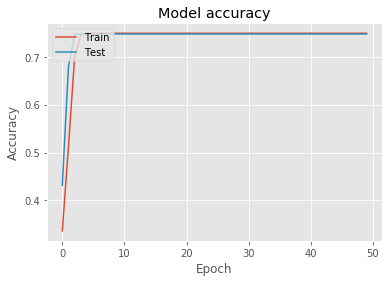

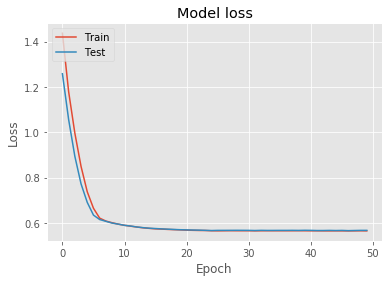

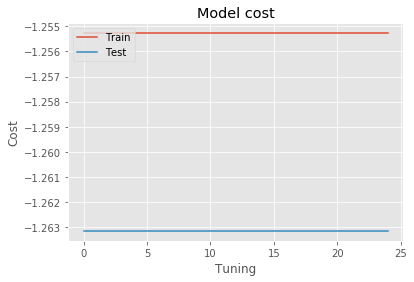

In [30]:
plt.plot(best_history.history['acc'])
plt.plot(best_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(best_history.history['loss'])
plt.plot(best_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
            
            # Plot training & validation loss values
plt.plot(cost)
plt.plot(val_cost)
plt.title('Model cost')
plt.ylabel('Cost')
plt.xlabel('Tuning')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [31]:
best_reg, best_iter, best_lr, best_val 

(0.1, 50, 0.01, -1.263157894736842)

In [32]:
from keras.layers import Dense, Dropout,Activation,BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l1_l2
cost=[]
val_cost=[]
num_iters = [50]#[500, 1000]
best_val = -100
regularization_strengths = [1e-2,1e-1,1e1]
learning_rates = [1e-2, 1e-3]
hidden_layers= [2, 4, 8, 16, 32,64]
dropout =  [0.0,0.5]
for hid in hidden_layers:
    for dr in dropout:
        for l_rate in learning_rates:
            for r in regularization_strengths:
                for iterations in num_iters:
                    input_dim= x_train.shape[1]
                    reg = l1_l2(l1=r, l2=r)
                    model = Sequential()
                    model.add(Dense(hid, input_dim=input_dim, init='uniform',
                        W_regularizer=reg,
                        bias_regularizer=reg
                    ))
                    
                    model.add(BatchNormalization())
                    model.add(Activation('relu'))
                    model.add(Dropout(dr))

                    model.add(Dense(1, activation='sigmoid', input_dim=(hid,),
                       W_regularizer=reg,
                        bias_regularizer=reg
                    ))
                    
                    opt= Adam(lr=l_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
                    model.compile(optimizer= opt, loss='binary_crossentropy',metrics=['accuracy'])
                    history=model.fit(x_train, y_train, nb_epoch=iterations,  batch_size=256,validation_data=(x_holdout, y_holdout))
                   
                    y_pred = model.predict(x_holdout).astype(int)
                    validation_cost= my_custom_loss_func(y_holdout,y_pred)
                    val_cost.append(validation_cost)
            
                    y_pred = model.predict(x_train).astype(int)
                    train_cost= my_custom_loss_func(y_train,y_pred)
                    cost.append(train_cost)
            
                    if validation_cost > best_val:
                        best_cost= cost
                        best_val_cost = val_cost
                        best_history=history
                        best_reg=r
                        best_iter=iterations
                        best_lr=l_rate
                        best_val = validation_cost 
                        best_model = model
                        best_hid=hid
                        best_dr=dr




/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, input_dim=20, bias_regularizer=<keras.reg..., kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", input_dim=(2,), bias_regularizer=<keras.reg..., kernel_regularizer=<keras.reg...)`
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1896 samples, validate on 475 samples
Epoch 1/50
1896/1896 [==============================] - 3s 1ms/step - loss: 0.4204 - acc: 0.9198 - val_loss: 0.3311 - val_acc: 0.9432
Epoch 2/50
1896/1896 [==============================] - 0s 14us/step - loss: 0.2986 - acc: 0.9446 - val_loss: 0.3147 - val_acc: 0.9263
Epoch 3/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.2857 - acc: 0.9388 - val_loss: 0.3037 - val_acc: 0.9326
Epoch 4/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.2822 - acc: 0.9404 - val_loss: 0.3036 - val_acc: 0.9242
Epoch 5/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.2822 - acc: 0.9346 - val_loss: 0.3039 - val_acc: 0.9242
Epoch 6/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.2823 - acc: 0.9367 - val_loss: 0.3048 - val_acc: 0.9242
Epoch 7/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.2837 - acc: 0.9309 - val_loss: 0.3050 - val_acc: 0.9242
Epoch 8/5

1896/1896 [==============================] - 0s 11us/step - loss: 0.6859 - acc: 0.9541 - val_loss: 0.6975 - val_acc: 0.9453
Epoch 11/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.6847 - acc: 0.9552 - val_loss: 0.6957 - val_acc: 0.9453
Epoch 12/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.6827 - acc: 0.9552 - val_loss: 0.6944 - val_acc: 0.9474
Epoch 13/50
1896/1896 [==============================] - 0s 14us/step - loss: 0.6811 - acc: 0.9552 - val_loss: 0.6918 - val_acc: 0.9495
Epoch 14/50
1896/1896 [==============================] - 0s 13us/step - loss: 0.6793 - acc: 0.9552 - val_loss: 0.6902 - val_acc: 0.9474
Epoch 15/50
1896/1896 [==============================] - 0s 13us/step - loss: 0.6770 - acc: 0.9552 - val_loss: 0.6883 - val_acc: 0.9474
Epoch 16/50
1896/1896 [==============================] - 0s 13us/step - loss: 0.6754 - acc: 0.9557 - val_loss: 0.6861 - val_acc: 0.9474
Epoch 17/50
1896/1896 [==============================] - 0s 

KeyboardInterrupt: 

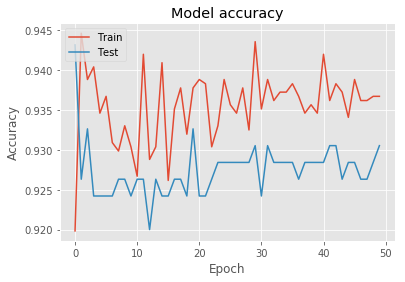

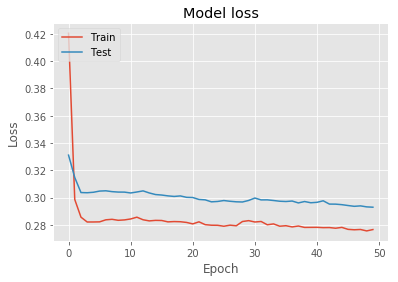

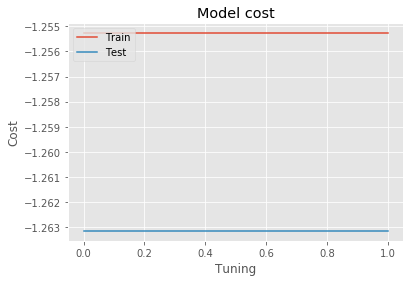

In [33]:
plt.plot(best_history.history['acc'])
plt.plot(best_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(best_history.history['loss'])
plt.plot(best_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
            
            # Plot training & validation loss values
plt.plot(cost)
plt.plot(val_cost)
plt.title('Model cost')
plt.ylabel('Cost')
plt.xlabel('Tuning')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [34]:
y_pred = model.predict(x_holdout).astype(int)
my_custom_loss_func(y_holdout,y_pred)

[[355   0]
 [120   0]]


-1.263157894736842